In [260]:
# 한글폰트
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonte-nanum* -qq

import matplotlib.font_manager as fm
fm._rebuild()

# 한글 폰트 확인하기
for fontInfo in fm.fontManager.ttflist:
  if 'Nanum' in fontInfo.name:
    print(fontInfo.name + ' = '+fontInfo.fname)

plt.rc('font', family = 'NanumGothic')

# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

E: Unable to locate package fonte-nanum*
E: Couldn't find any package by glob 'fonte-nanum*'
E: Couldn't find any package by regex 'fonte-nanum*'
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf


In [261]:
data = pd.read_csv('/content/drive/MyDrive/Proj_WT/DataSets/Seoul/SWeatherTour9yrs.csv')
data.head()

,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd),평균현지기압(hPa),평균해면기압(hPa),최고해면기압(hPa),최저해면기압(hPa),최고해면기압 나타난날(yyyymmdd),최저해면기압 나타난날(yyyymmdd),평균수증기압(hPa),최고수증기압(hPa),최저수증기압(hPa),최고수증기압 나타난날(yyyymmdd),최저수증기압 나타난날(yyyymmdd),평균이슬점온도(°C),평균상대습도(%),최소상대습도(%),최소상대습도 나타난날(yyyymmdd),월합강수량(00~24h만)(mm),일최다강수량(mm),1시간최다강수량(mm),10분최다강수량(mm),일최다강수량 나타난날(yyyymmdd),1시간최다강수량 나타난날(yyyymmdd),10분최다강수량 나타난날(yyyymmdd),소형총증발량(mm),소형일최대증발량(mm),대형총증발량(mm),대형일최대증발량(mm),소형일최대증발량 나타난날(yyyymmdd),대형일최대증발량 나타난날(yyyymmdd),평균풍속(m/s),최대풍속(m/s),최대순간풍속(m/s),최대풍속 풍향(16방위),최대순간풍속 풍향(16방위),최대풍속 나타난날(yyyymmdd),최대순간풍속 나타난날(yyyymmdd),최다풍향(16방위),평균운량(1/10),평균중하층운량(1/10),합계 일조시간(hr),일조율(%),합계 일사량(MJ/m2),최심적설(cm),최심신적설(cm),3시간신적설합(cm),최심적설 나타난날(yyyymmdd),최심신적설 나타난날(yyyymmdd),평균 최저초상온도(°C),최저초상온도(°C),최저초상온도 나타난날(yyyymmdd),평균지면온도(°C),0.05m평균지중온도(°C),0.1m평균지중온도(°C),0.2m평균지중온도(°C),0.3m평균지중온도(°C),0.5m평균지중온도(°C),1.0m평균지중온도(°C),1.5m평균지중온도(°C),3.0m평균지중온도(°C),5.0m평균지중온도(°C),서울_종로구_경복궁,서울_종로구_종묘,서울_종로구_창경궁,서울_종로구_창덕궁,서울_중구_남산골한옥마을,서울_중구_덕수궁,서울_중구_서울시립미술관 본관,서울_용산구_국립중앙박물관,서울_노원구_태릉 · 강릉 · 조선왕릉전시관,서울_서대문구_서대문형무소역사관,서울_서초구_헌릉ㆍ인릉
0,201101,-7.2,-3.4,-10.5,0.3,-17.8,20110114,20110116,1016.1,1027.3,1039.6,1014.9,20110127,20110111,2.0,4.5,0.7,20110123,20110116,-15.3,54,19,20110119,8.9,5.3,NaN,NaN,20110123,NaN,NaN,37.5,1.7,NaN,NaN,20110112,NaN,2.8,8.0,14.4,270,320,20110115,20110115,270,2.7,1.8,218.5,71.15,308.49,6.0,6.0,12.2,20110124.0,20110123.0,-16.1,-22.2,20110117,-4.7,-3.3,-2.7,-2.2,-1.1,1.5,5.3,8.3,14.6,17.2,141183,11486,17644,43677,72313,92135,234587,260272,1747,18407,736
1,201102,1.2,5.9,-2.5,13.2,-9.2,20110226,20110212,1011.3,1022.1,1031.3,1007.6,20110215,20110208,3.7,8.1,1.3,20110227,20110225,-7.6,55,15,20110225,29.1,28.5,NaN,NaN,20110227,NaN,NaN,50.5,3.2,NaN,NaN,20110225,NaN,2.6,10.6,17.4,70,50,20110227,20110227,270,4.0,2.0,166.6,55.07,303.18,1.6,0.2,0.2,20110201.0,20110217.0,-9.6,-16.5,20110213,1.7,0.6,0.5,0.3,0.4,1.0,3.5,6.2,12.3,15.9,230814,17078,35708,73330,135771,132920,171376,224691,1943,14387,1730
2,201103,3.6,8.3,-0.1,16.8,-5.5,20110331,20110303,1010.7,1021.4,1029.0,1011.4,20110326,20110320,4.1,9.5,0.9,20110313,20110316,-6.6,51,12,20110322,14.6,5.8,NaN,NaN,20110324,NaN,NaN,91.7,4.4,NaN,NaN,20110321,NaN,3.4,9.9,15.4,230,250,20110308,20110308,270,3.3,2.0,240.2,64.83,506.61,1.8,1.8,2.5,20110324.0,20110324.0,-5.0,-11.9,20110303,6.4,5.2,5.3,5.2,5.4,5.2,5.8,6.9,11.0,14.7,228276,22238,29856,78705,105735,64869,260687,184565,3000,47554,2085
3,201104,10.7,15.6,6.8,19.0,4.3,20110415,20110401,1003.8,1014.1,1028.4,998.7,20110405,20110427,6.8,15.3,1.8,20110430,20110411,0.3,54,10,20110411,110.1,69.0,12.0,5.5,20110430,20110430.0,20110430.0,112.7,6.6,79.6,4.5,20110411,20110411.0,3.2,9.5,16.4,230,230,20110424,20110424,270,4.7,2.9,202.1,51.20,504.97,NaN,NaN,NaN,NaN,NaN,1.1,-4.7,20110401,13.6,12.2,12.1,11.7,11.7,10.7,10.0,9.6,10.8,13.5,349368,30470,70101,129150,176991,85548,56024,240861,8029,66009,5212
4,201105,17.9,23.0,13.6,31.2,8.5,20110529,20110502,1000.8,1010.7,1017.1,999.8,20110524,20110501,11.1,22.4,4.8,20110509,20110514,7.9,57,15,20110508,53.4,15.0,3.5,1.5,20110520,20110520.0,20110520.0,134.6,8.0,95.1,5.4,20110529,20110514.0,2.8,9.7,16.4,200,230,20110519,20110513,250,5.6,2.8,180.4,41.02,529.85,NaN,NaN,NaN,NaN,NaN,8.9,3.2,20110504,21.0,19.4,19.1,18.5,18.2,16.3,14.6,13.4,11.9,13.2,438567,56106,78017,151833,188983,103100,279310,307969,17108,72267,6201


# 논문에 있는 feature 뽑아내기

In [262]:
# 평균기온, 최고기온, 최소상대습도, 평균상대습도, 총 강수량, 평균풍속, 일조시간과 target변수들을 뽑아낸다.
data = data[['일시','평균기온(°C)','최고기온(°C)','최소상대습도(%)','평균상대습도(%)','월합강수량(00~24h만)(mm)','평균풍속(m/s)','합계 일조시간(hr)','서울_종로구_경복궁', '서울_종로구_종묘', '서울_종로구_창경궁', '서울_종로구_창덕궁',
       '서울_중구_남산골한옥마을', '서울_중구_덕수궁', '서울_중구_서울시립미술관 본관', '서울_용산구_국립중앙박물관',
       '서울_노원구_태릉 ·  강릉 · 조선왕릉전시관', '서울_서대문구_서대문형무소역사관',
       '서울_서초구_헌릉ㆍ인릉']]

In [263]:
data=data.rename(columns = {'평균기온(°C)':'평균기온', '최고기온(°C)':'최고기온','최소상대습도(%)':'최저상대습도','평균상대습도(%)':'평균상대습도', '월합강수량(00~24h만)(mm)':'총강수량','평균풍속(m/s)':'평균풍속','합계 일조시간(hr)':'일조시간'})

In [264]:
data.head()

,일시,평균기온,최고기온,최저상대습도,평균상대습도,총강수량,평균풍속,일조시간,서울_종로구_경복궁,서울_종로구_종묘,서울_종로구_창경궁,서울_종로구_창덕궁,서울_중구_남산골한옥마을,서울_중구_덕수궁,서울_중구_서울시립미술관 본관,서울_용산구_국립중앙박물관,서울_노원구_태릉 · 강릉 · 조선왕릉전시관,서울_서대문구_서대문형무소역사관,서울_서초구_헌릉ㆍ인릉
0,201101,-7.2,0.3,19,54,8.9,2.8,218.5,141183,11486,17644,43677,72313,92135,234587,260272,1747,18407,736
1,201102,1.2,13.2,15,55,29.1,2.6,166.6,230814,17078,35708,73330,135771,132920,171376,224691,1943,14387,1730
2,201103,3.6,16.8,12,51,14.6,3.4,240.2,228276,22238,29856,78705,105735,64869,260687,184565,3000,47554,2085
3,201104,10.7,19.0,10,54,110.1,3.2,202.1,349368,30470,70101,129150,176991,85548,56024,240861,8029,66009,5212
4,201105,17.9,31.2,15,57,53.4,2.8,180.4,438567,56106,78017,151833,188983,103100,279310,307969,17108,72267,6201


# EDA


## 종속변수 확인하기

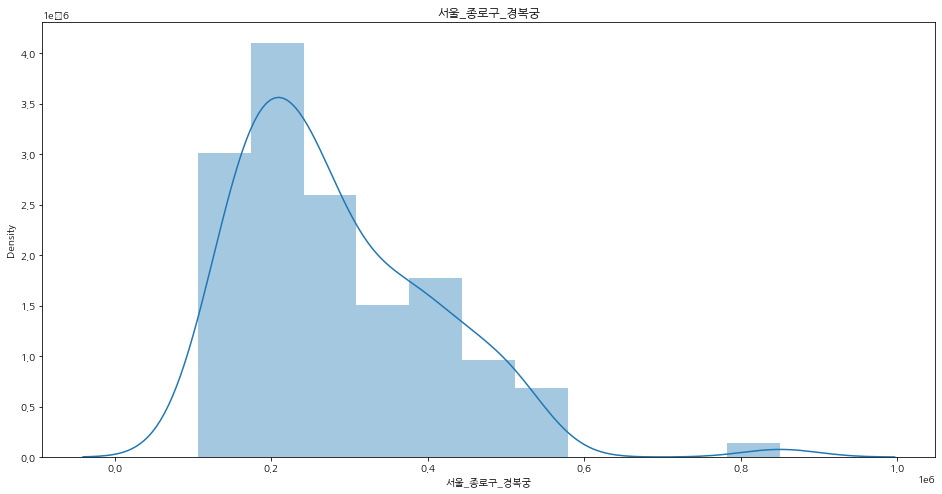

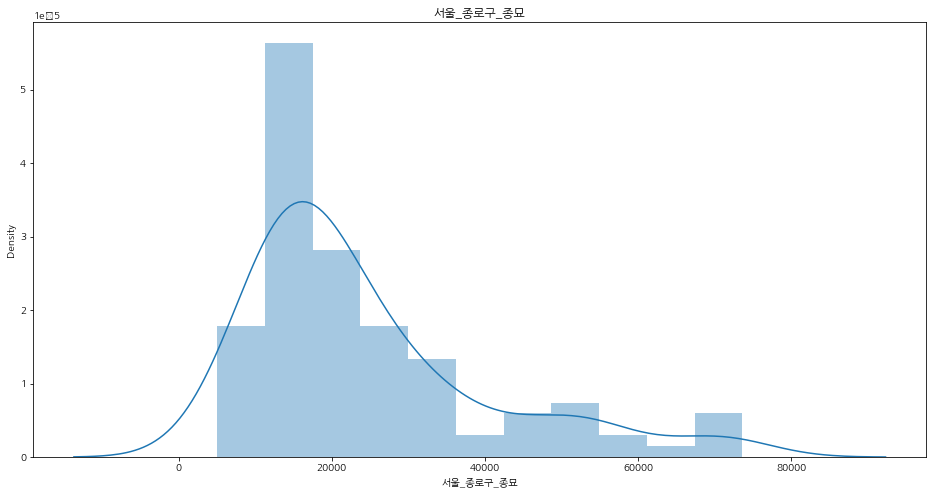

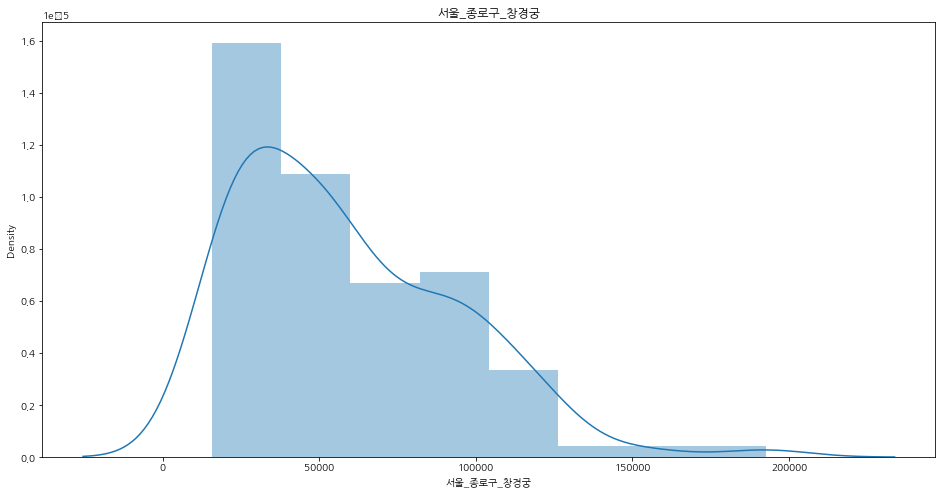

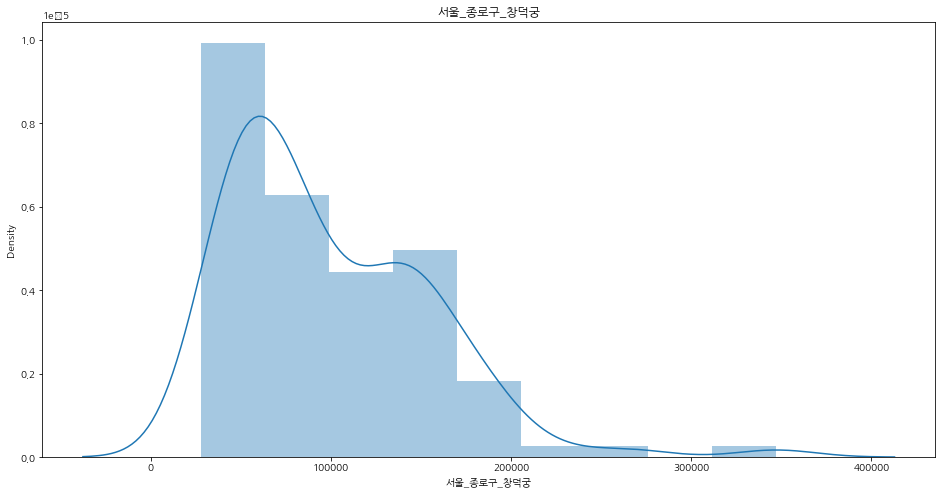

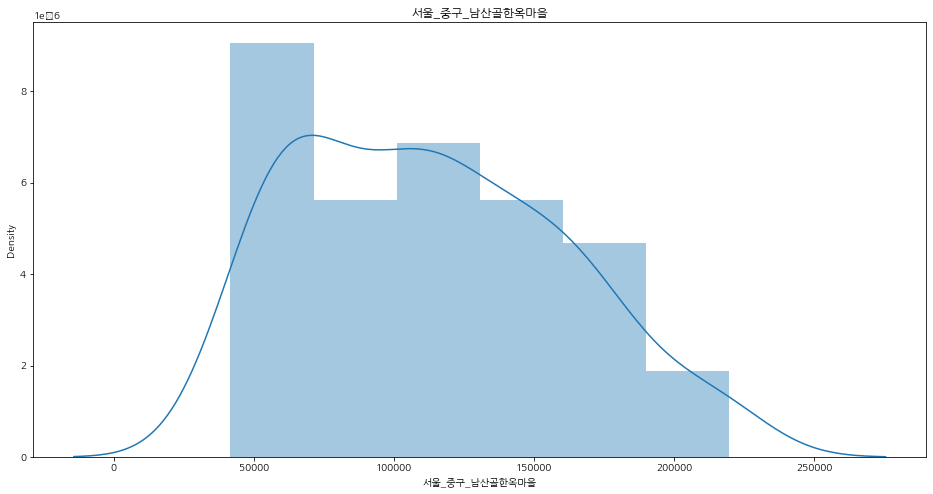

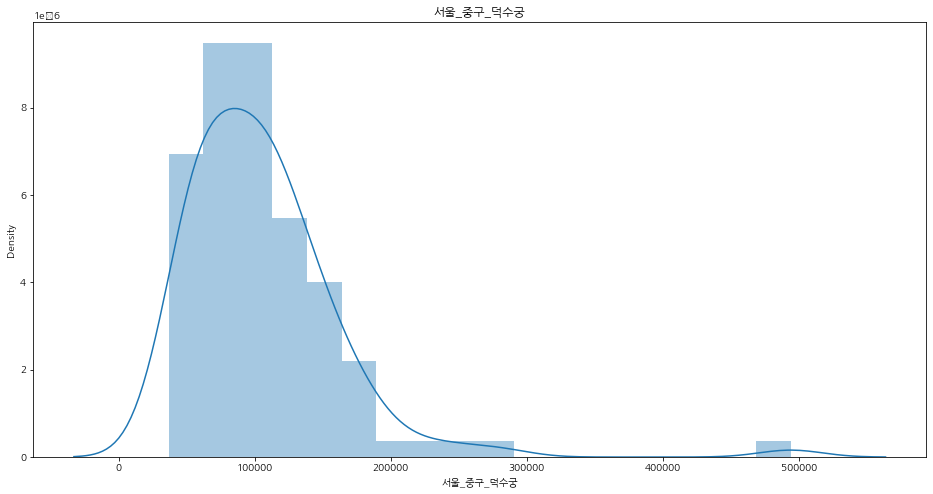

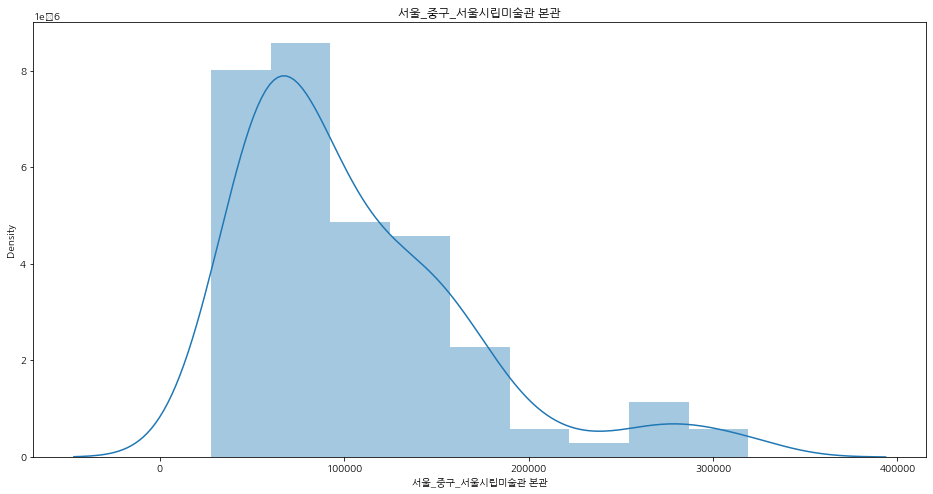

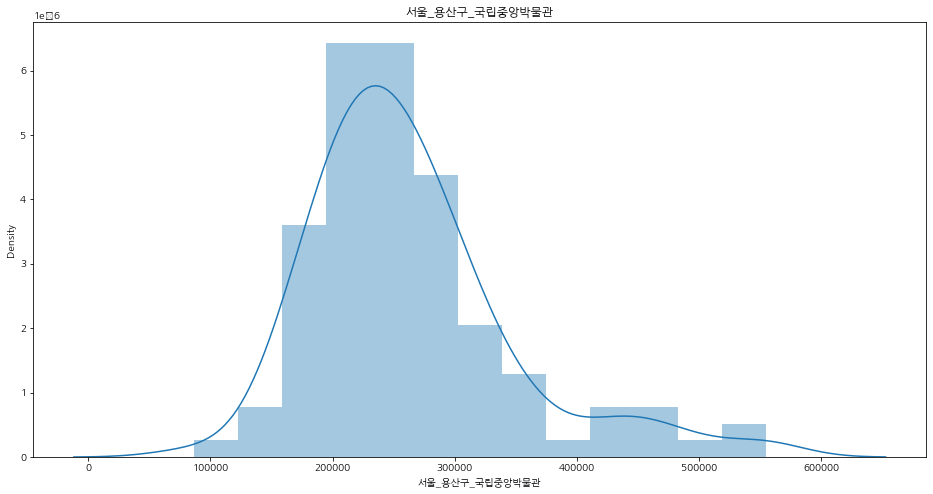

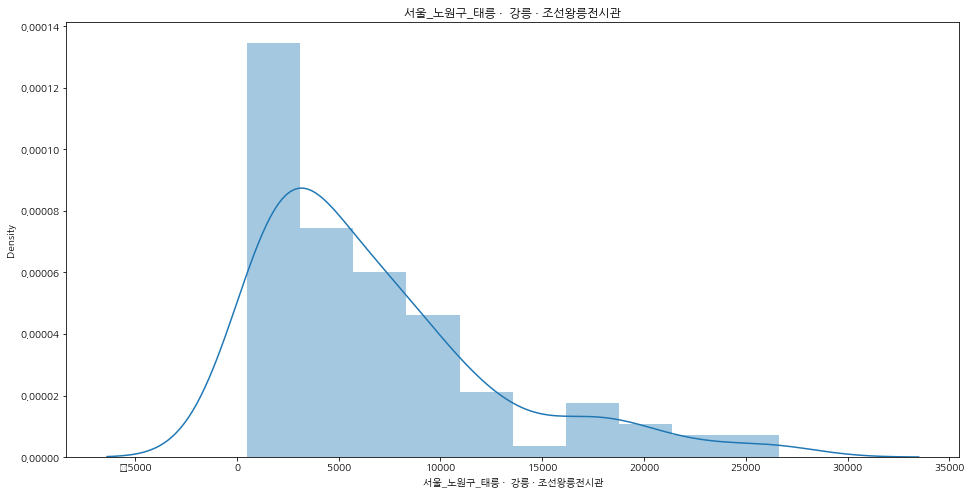

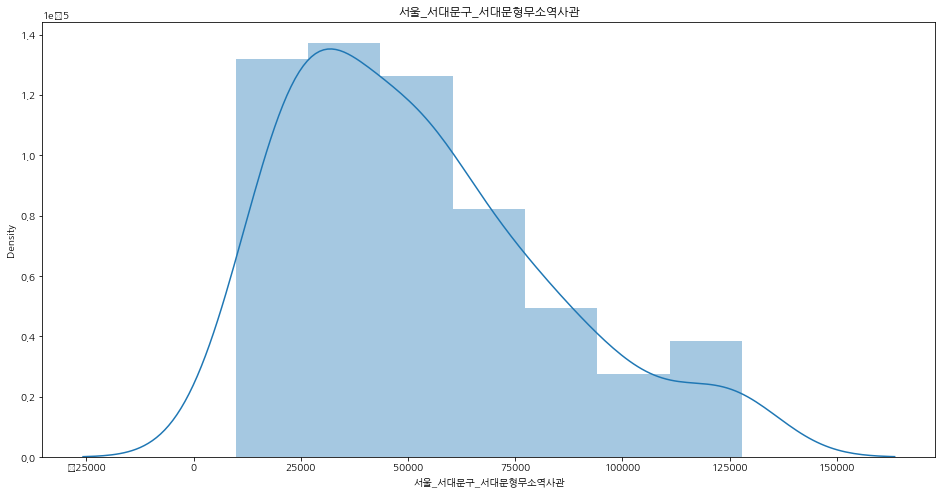

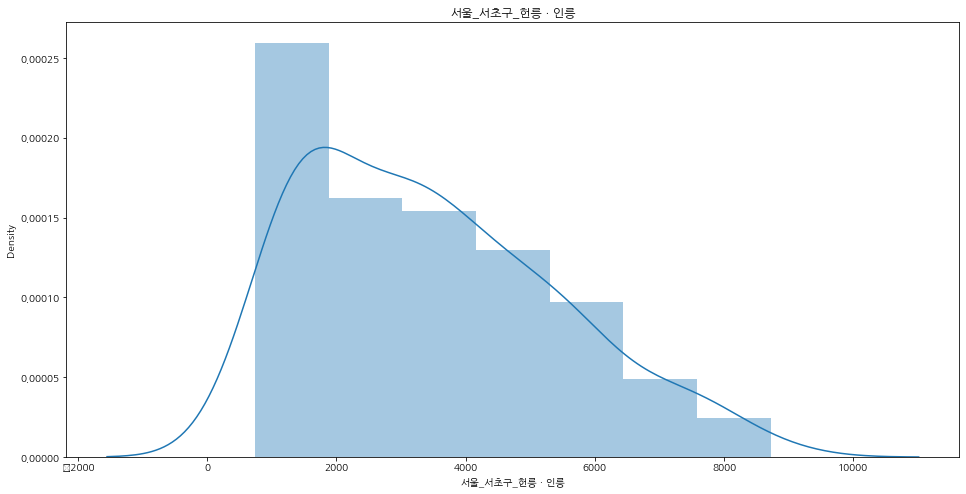

In [265]:
# target변수가 정규분포를 따르는지 확인해 보자.
# 몇 개의 target을 제외하고 정규분포를 따르는 것 같다.
for i in data.loc[:,'서울_종로구_경복궁':].columns:
  plt.figure(figsize = (16,8))
  sns.distplot(data[i])
  plt.title(f'{i}')
  plt.show()

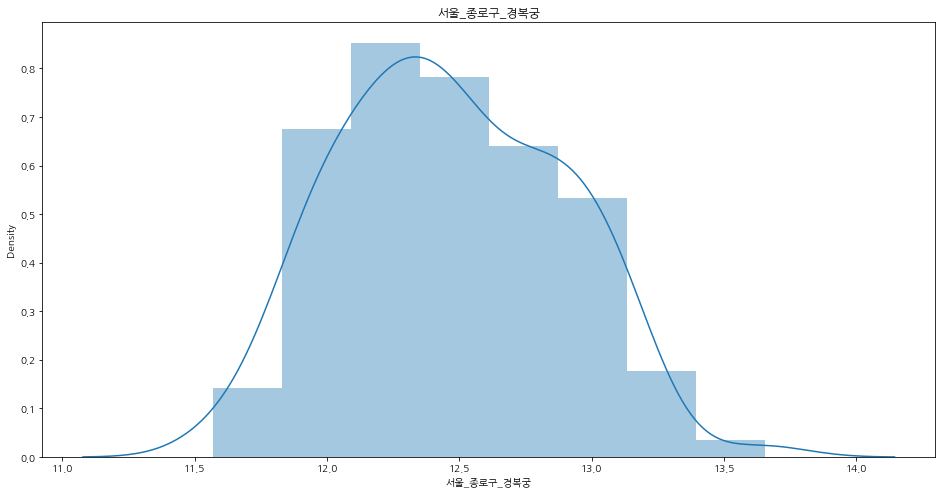

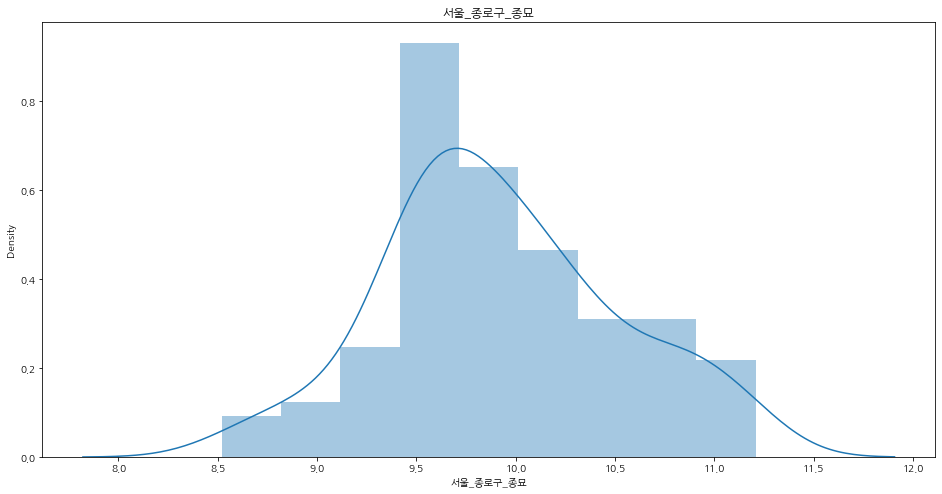

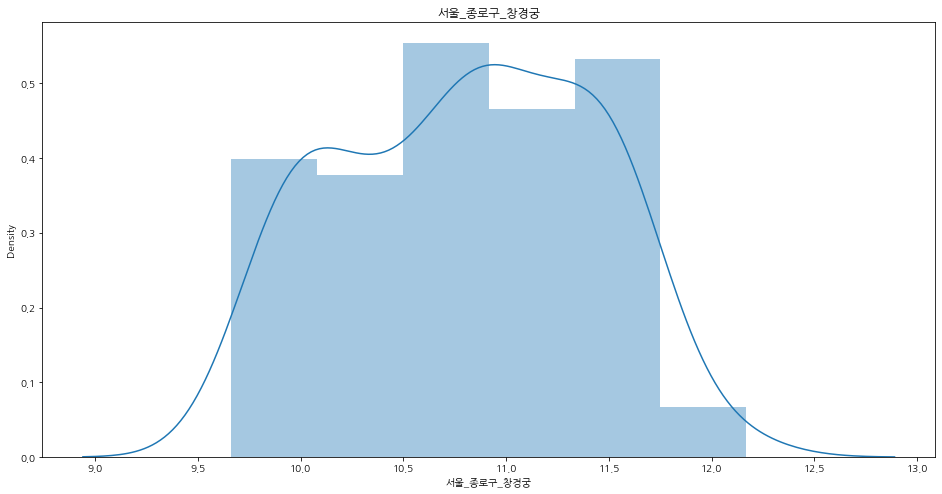

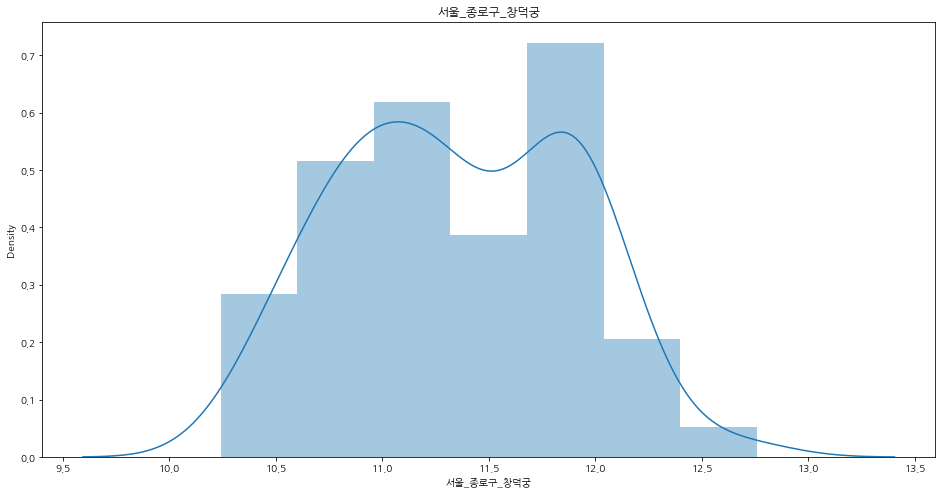

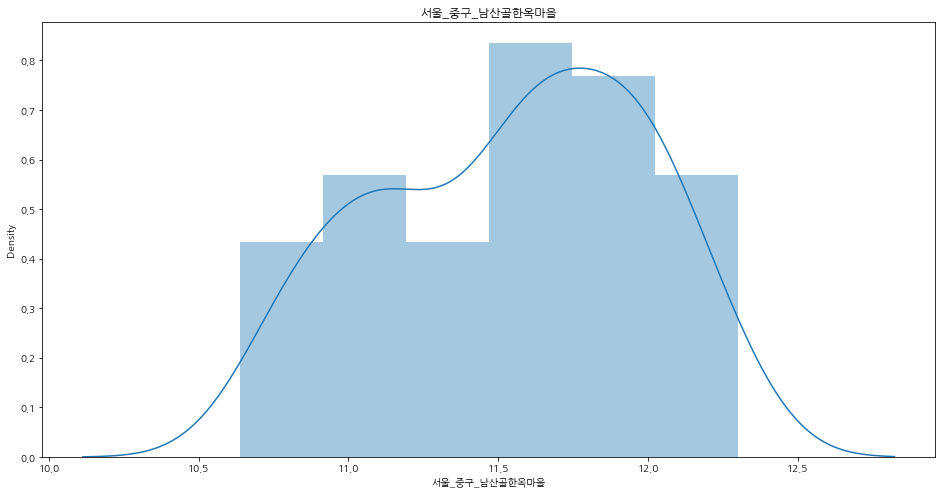

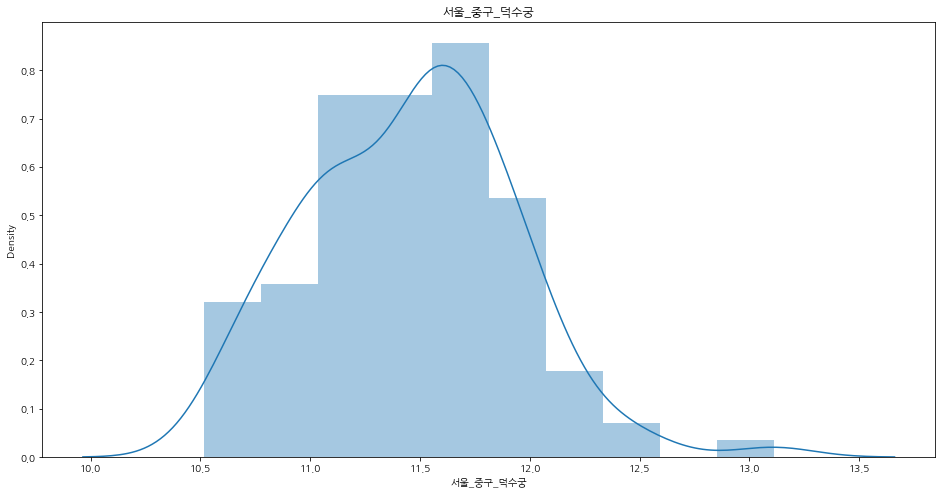

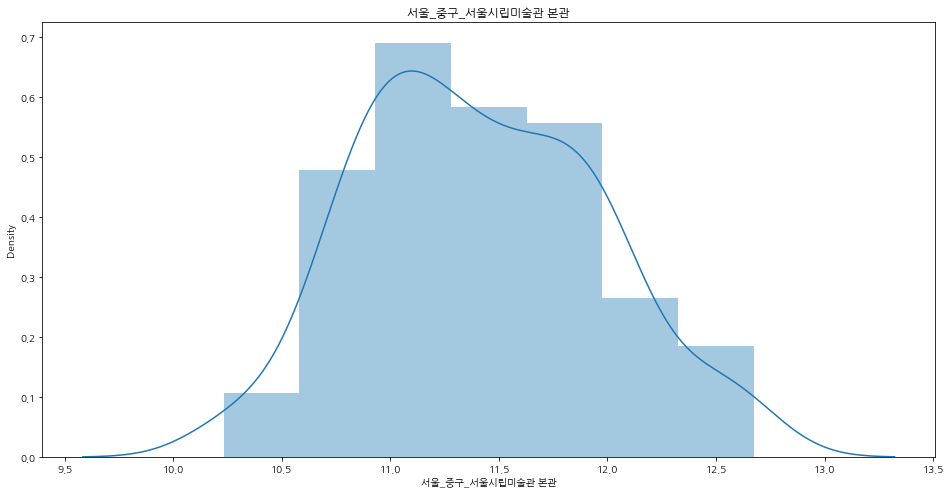

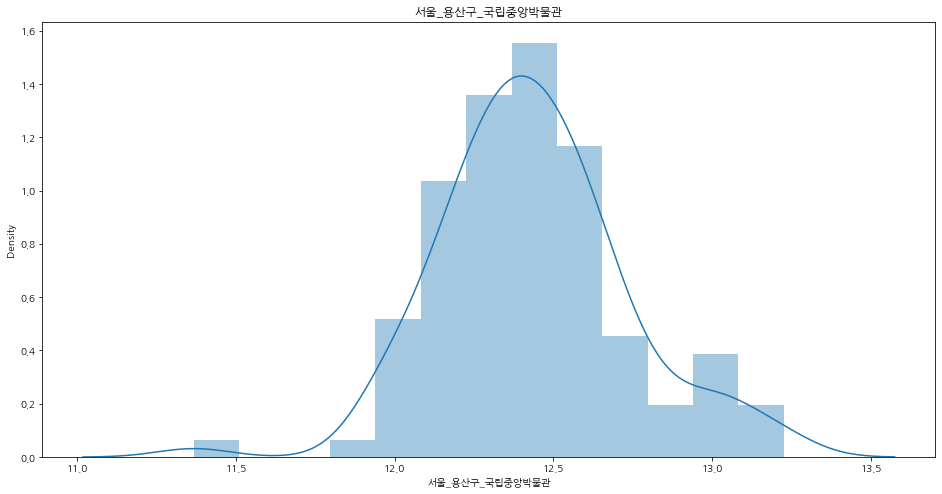

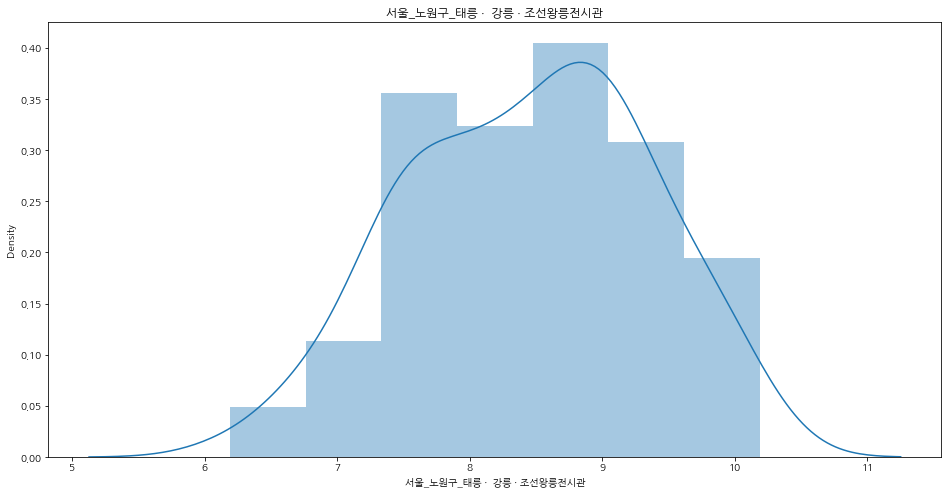

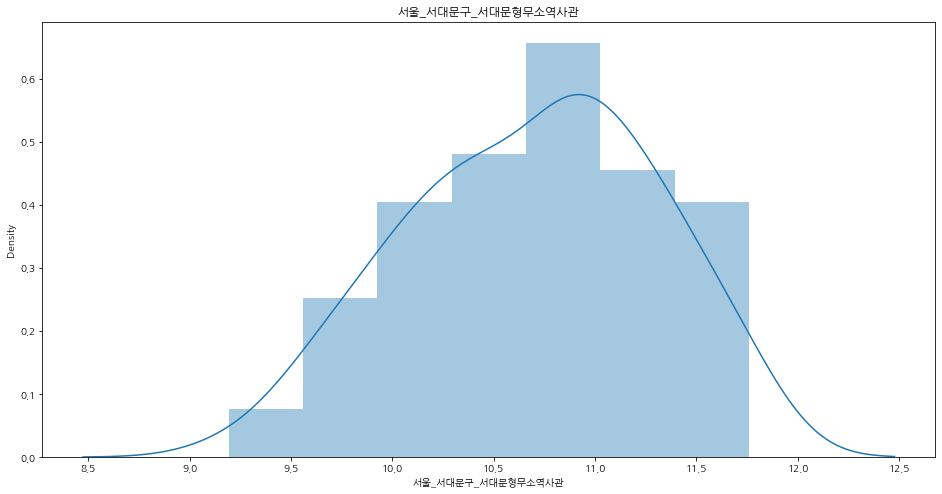

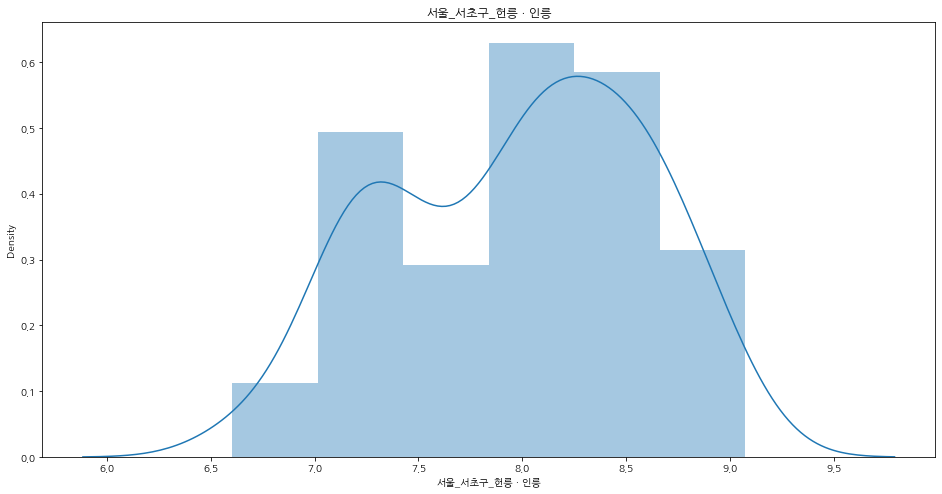

In [266]:
# log를 씌워줌으로써 target이 완전히 정규분포를 따르게 만들어보자.
for i in data.loc[:,'서울_종로구_경복궁':].columns:
  data[i] = data[i].apply(lambda x:np.log1p(x))

# log를 씌운 데이터를 가지고 그래프를 그려보자.
for i in data.loc[:,'서울_종로구_경복궁':].columns:
  plt.figure(figsize = (16,8))
  sns.distplot(data[i])
  plt.title(f'{i}')
  plt.show()


## 다른 feature들을 target변수와 비교해보기

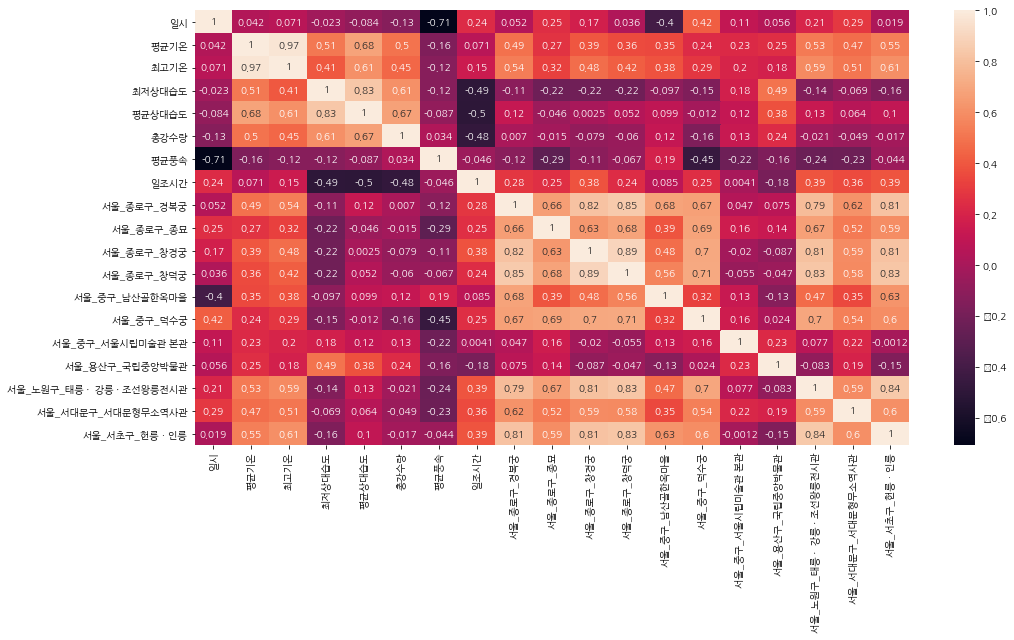

In [267]:
# 상관계수를 확인해 보면서 분석을 어떻게 진행할지 확인해 보자.
data_corr = data.corr()
plt.figure(figsize = (16,8))
sns.heatmap(data_corr, annot = True)

In [268]:
# 상관게수를 살펴보면 서울_마포구_트릭아이미술관과 서울_중구_서울시립미술관과 국립중앙박물관이 증가하고 나머지는 감소하는 것을 확인할 수 있다.
# 그리고 반대로 조선왕릉 전시관이 오르면 시립미술관과 국립중앙박물관이 조금 오르거나 아니면 내리는 경향이 있다.
# 그러면 실내와 실외로 구분해서 분석을 진행한다면 분석에 용이할 것이라고 확인된다.

# 1. 가정: 실내와 실외를 기준으로 feature의 중요도가 다를 것이라고 확인된다.
# 먼저 우리가 알고 있는 기온에 따른 관광지에 영향이 있는지 없는지를 확인해 보자.

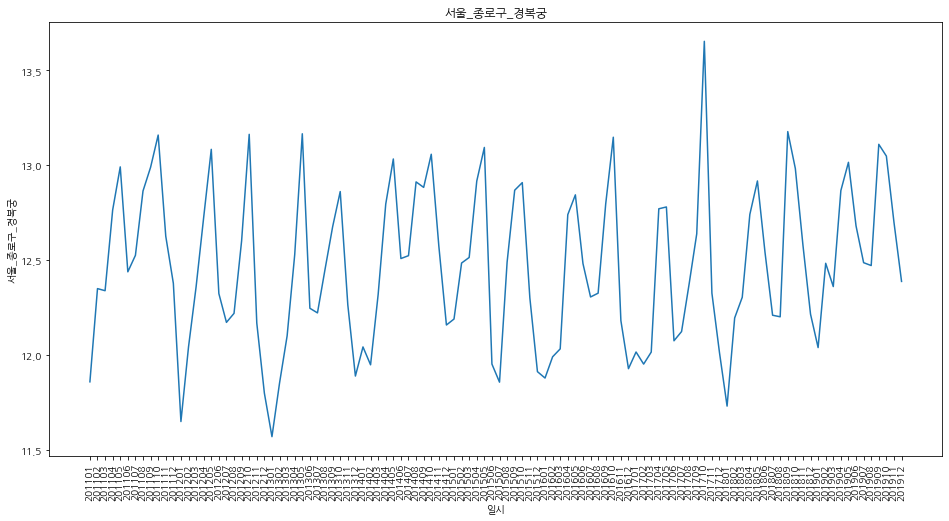

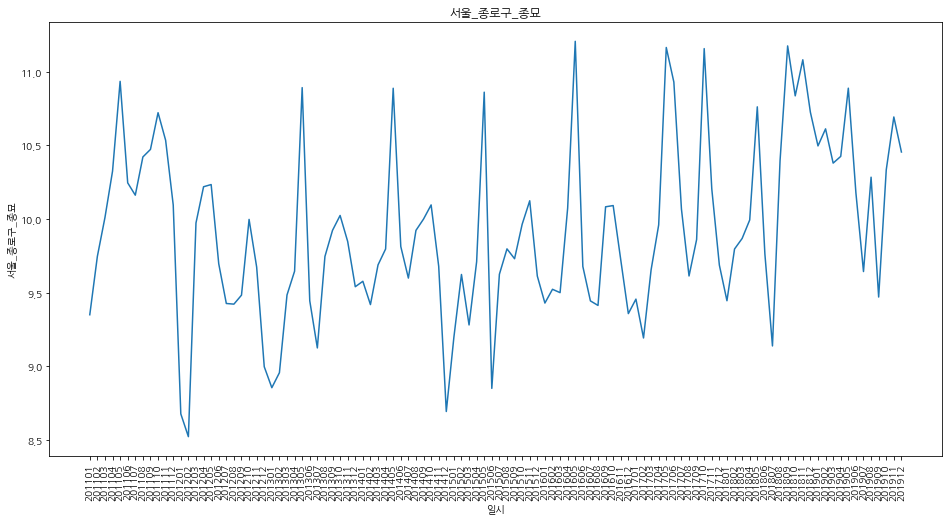

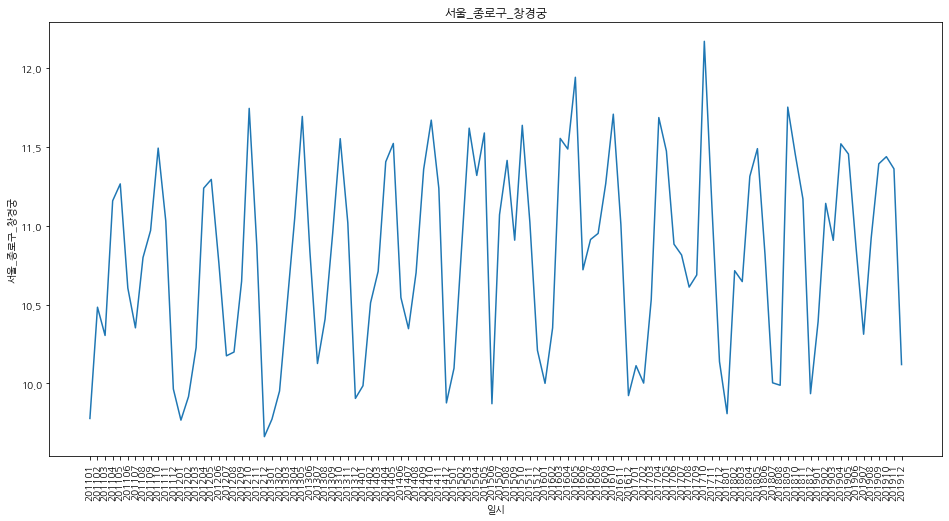

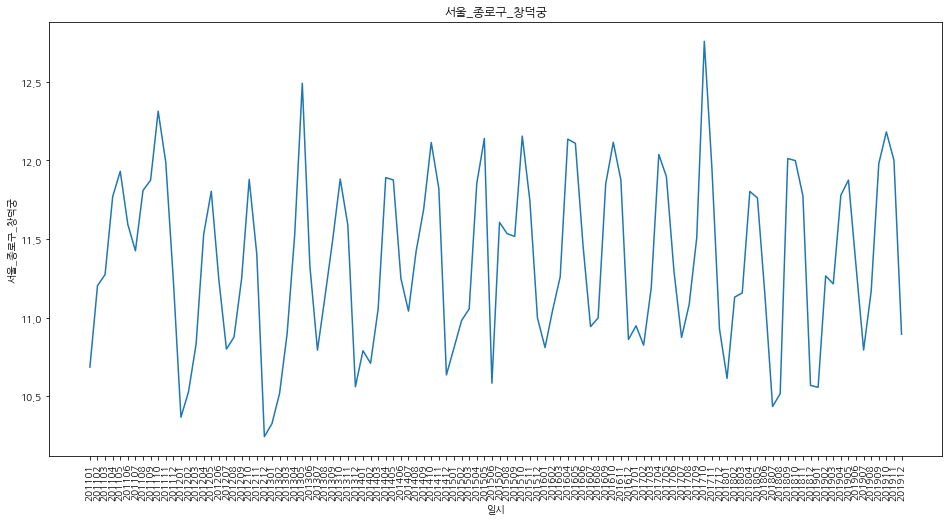

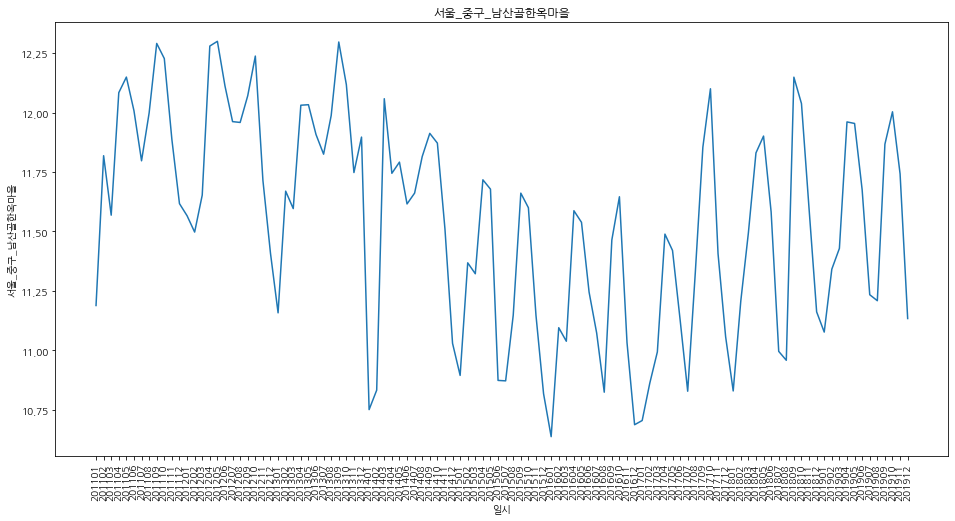

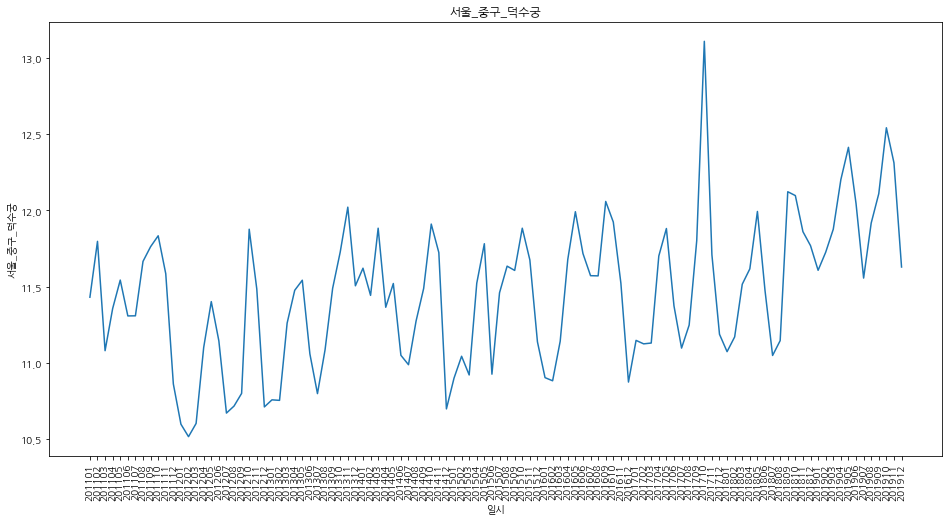

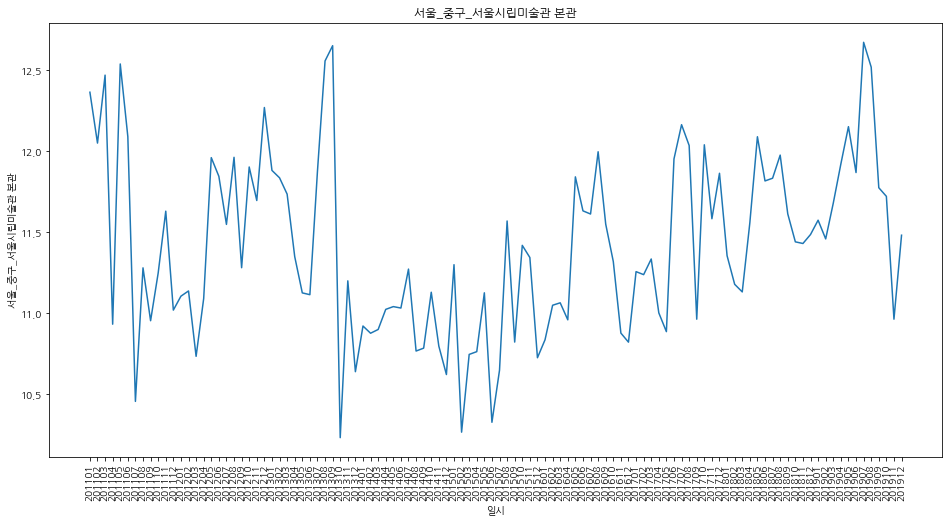

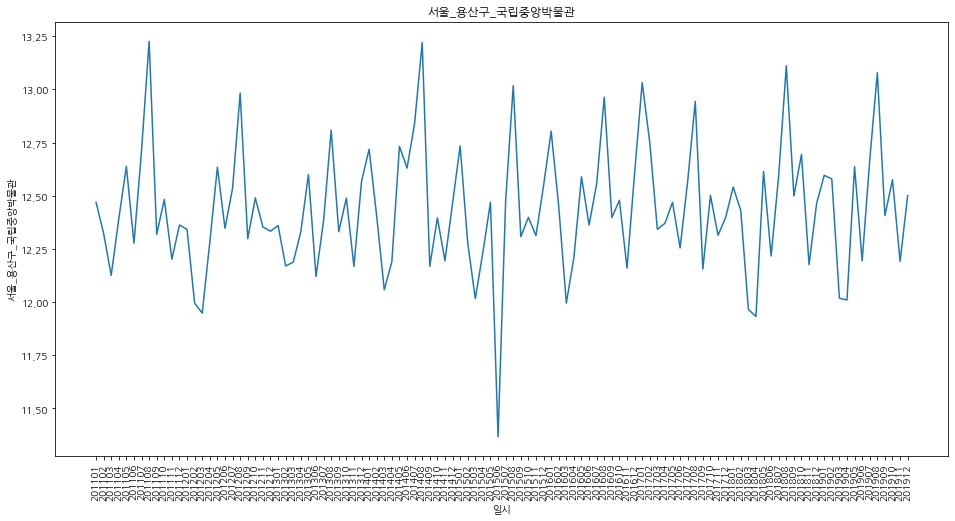

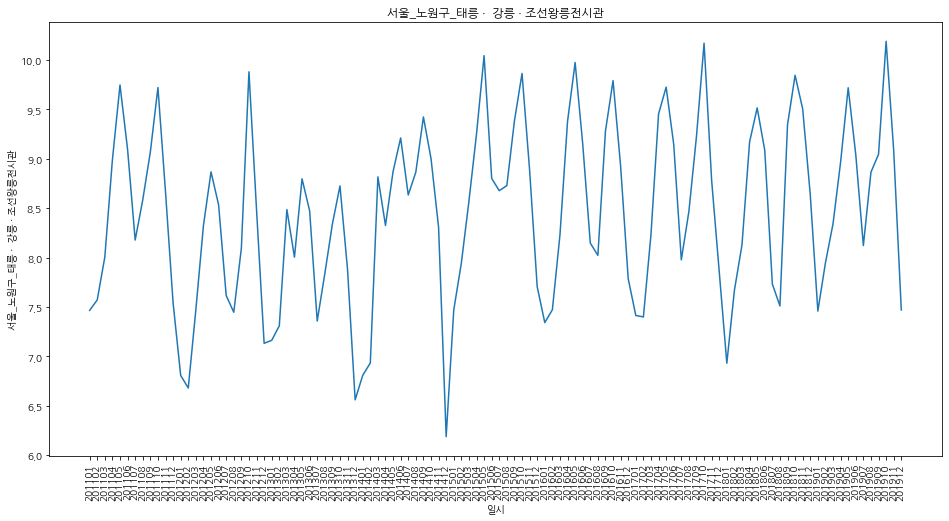

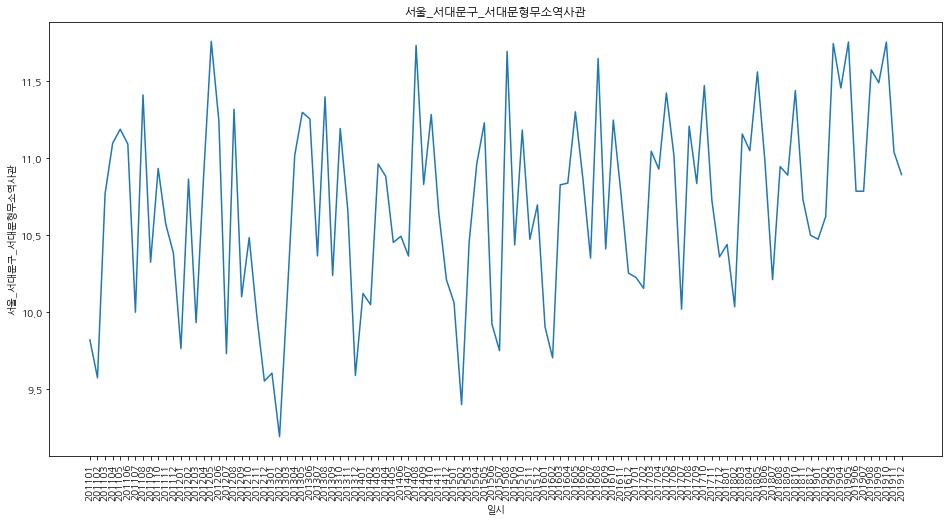

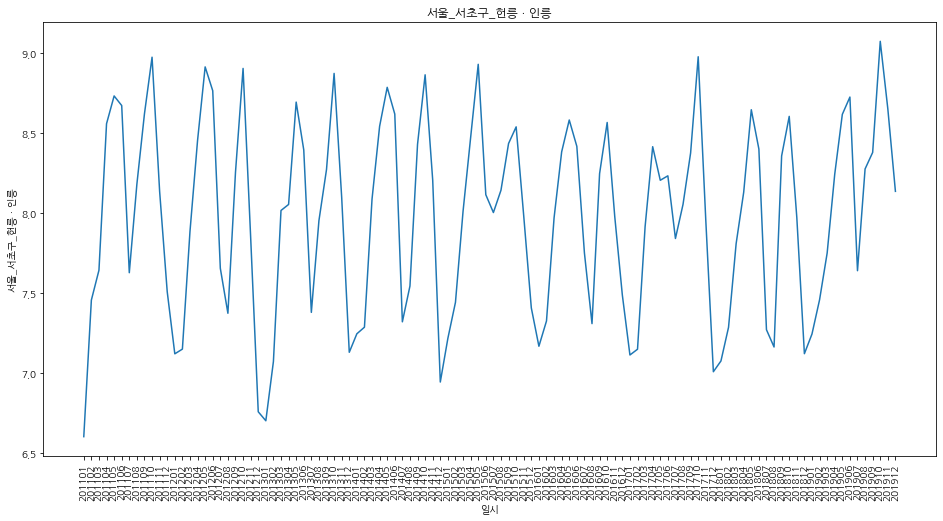

In [269]:
# lineplot 을 그려보도록 하자.
data['일시'] = data['일시'].astype('str')

# 실내와 실외의 차이가 심하고 관광지별로 주기성을 띄고 있다고 판단한다.\
for i in data.loc[:,'서울_종로구_경복궁':].columns:
  plt.figure(figsize = (16,8))
  sns.lineplot(data =data, x = '일시', y = i)
  plt.xticks(rotation=90)
  plt.title(f'{i}')
  plt.show()

# 년, 달, 계절의 변수 만들어주기.

In [270]:
def datetime(data):
  data['year'] = data['일시'].apply(lambda x: x[:4])
  data['month'] = data['일시'].apply(lambda x: x[4:])
  for i in data.index:
    if data.loc[i,'month'] in ['02','12','01']:
      data.loc[i,'weather'] = '겨울'
    elif data.loc[i,'month'] in ['03','04','05']:
      data.loc[i,'weather'] = '봄'
    elif data.loc[i,'month'] in ['06','07','08']:
      data.loc[i,'weather'] = '여름'
    else:
      data.loc[i,'weather'] = '가을'
  return data

data = datetime(data)

# 서울_종로구_경복궁

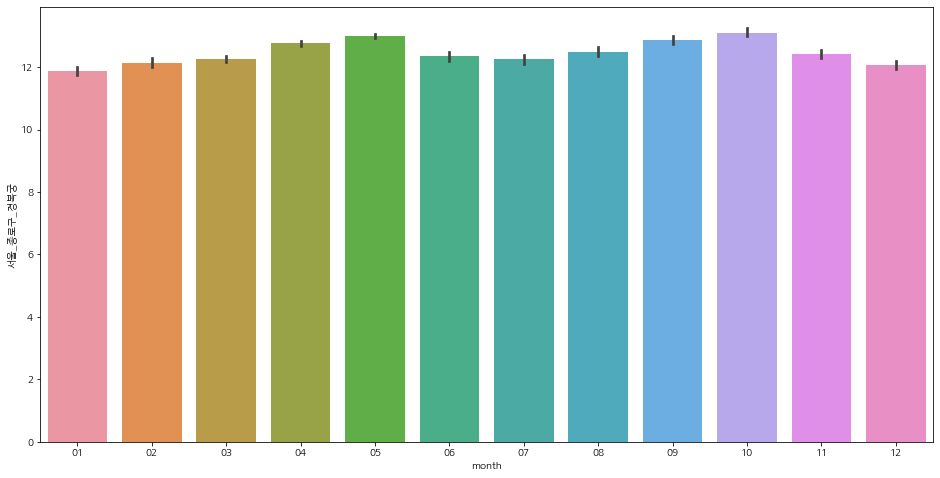

In [271]:
# 월별로 차이가 있는지 확인해보자.
plt.figure(figsize = (16,8))
sns.barplot(data = data, x = 'month', y = '서울_종로구_경복궁')

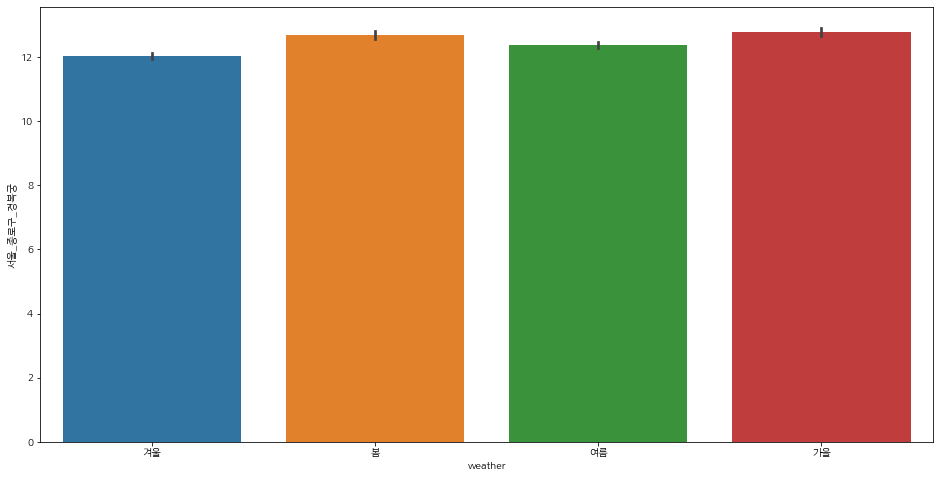

In [272]:
# 계절별로 차이가 있는지 확인해보자.
plt.figure(figsize = (16,8))
sns.barplot(data = data, x = 'weather', y = '서울_종로구_경복궁')

# 가을과 봄에 가장 많은 관광객이 방문하고 추운 겨울날에는 가장 적은 관광객이 온다.

# 기온에 관하여 EDA 해보기

Text(0.5, 1.0, '평균기온의 boxenplot')

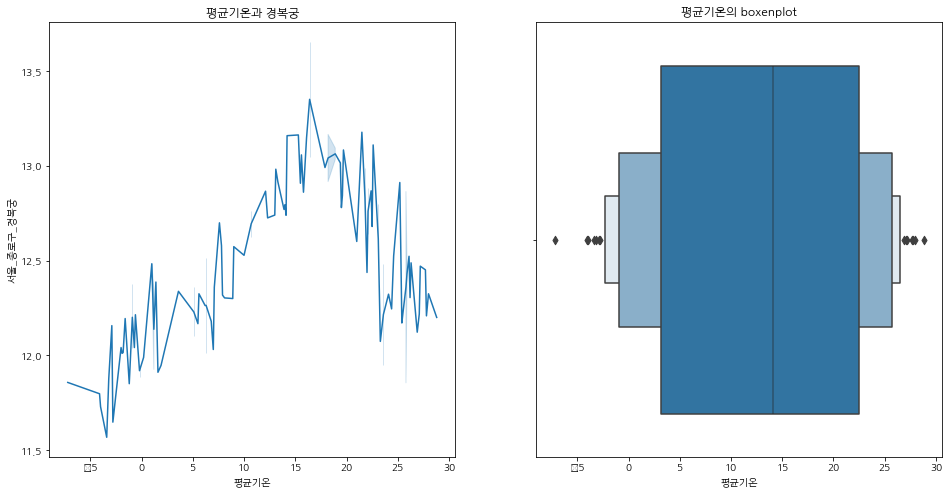

In [273]:
# 평균기온
# 봄과 가을의 날씨에 관광객이 많아지고 추운 겨울이나 여름에는 관광객의 수가 줄어드는 경향이 있다.
fig, ax  = plt.subplots(ncols = 2, figsize = (16,8))
sns.lineplot(data = data, x  = '평균기온', y = '서울_종로구_경복궁', ax = ax[0])
sns.boxenplot(data['평균기온'], ax = ax[1])
ax[0].set_title('평균기온과 경복궁')
ax[1].set_title('평균기온의 boxenplot')

Text(0.5, 1.0, '최고기온의 boxenplot')

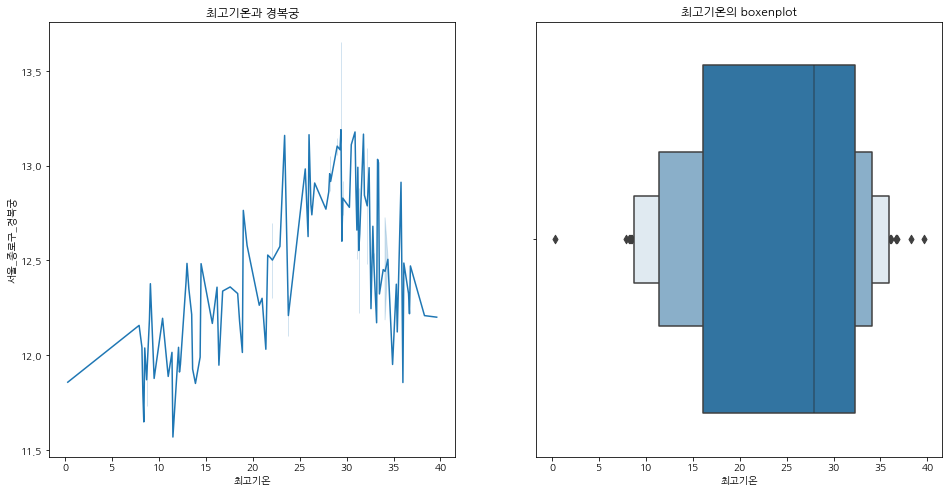

In [274]:
# 최고기온
# 최고기온의 경우 25~30에 가장 많은 관광객이 방문하는 것으로 보인다. 그리고 겨울이나 완전 여름인 날씨에는 다시 줄어드는 경향이 있다.
fig, ax  = plt.subplots(ncols = 2, figsize = (16,8))
sns.lineplot(data = data, x  = '최고기온', y = '서울_종로구_경복궁', ax = ax[0])
sns.boxenplot(data['최고기온'], ax = ax[1])
ax[0].set_title('최고기온과 경복궁')
ax[1].set_title('최고기온의 boxenplot')

# 습도에 관한 EDA

Text(0.5, 1.0, '최저상대습도 boxenplot')

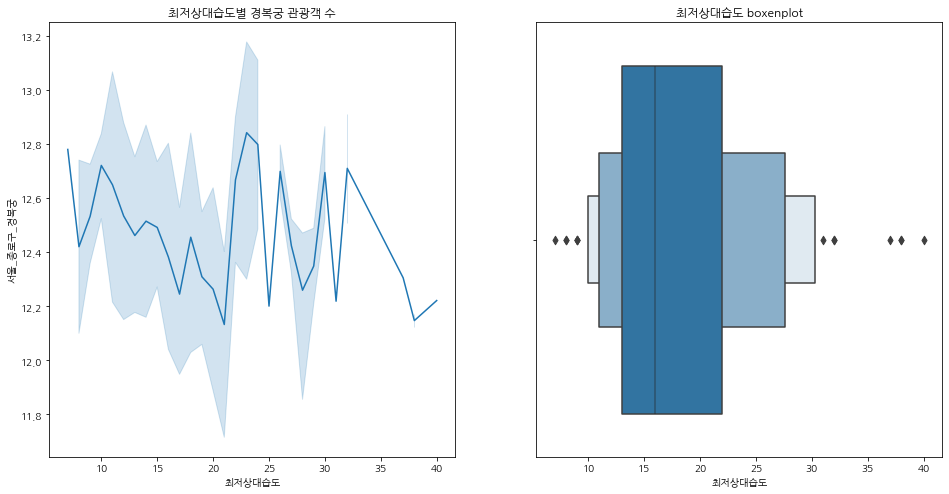

In [275]:
# 최저상대습도로 관광객 수 확인해보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.lineplot(data = data, x = '최저상대습도', y = '서울_종로구_경복궁', ax = ax[0])
sns.boxenplot(data['최저상대습도'], ax = ax[1])
ax[0].set_title('최저상대습도별 경복궁 관광객 수')
ax[1].set_title('최저상대습도 boxenplot')

Text(0.5, 1.0, '평균상대습도 boxenplot')

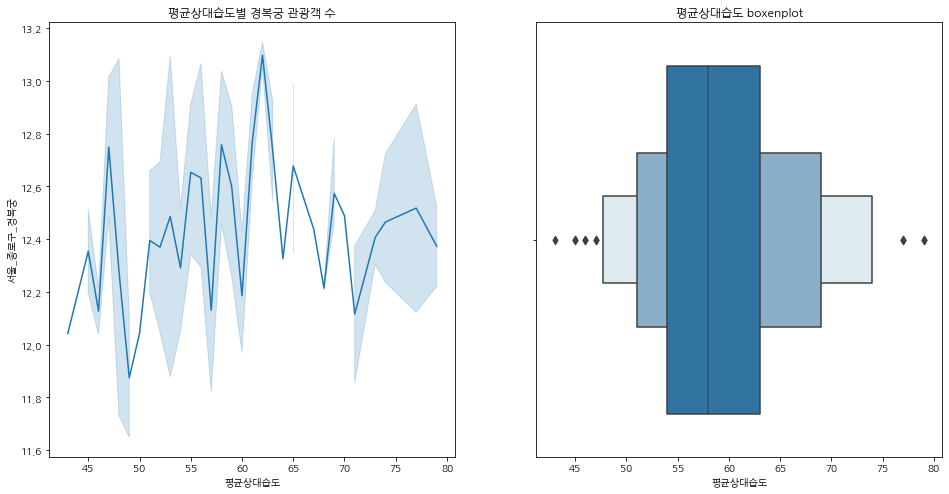

In [276]:
# 평균상대습도로 관광객 수 확인해보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.lineplot(data = data, x = '평균상대습도', y = '서울_종로구_경복궁', ax = ax[0])
sns.boxenplot(data['평균상대습도'], ax = ax[1])
ax[0].set_title('평균상대습도별 경복궁 관광객 수')
ax[1].set_title('평균상대습도 boxenplot')

# 강수량에 관한 EDA

Text(0.5, 1.0, '총강수량 boxenplot')

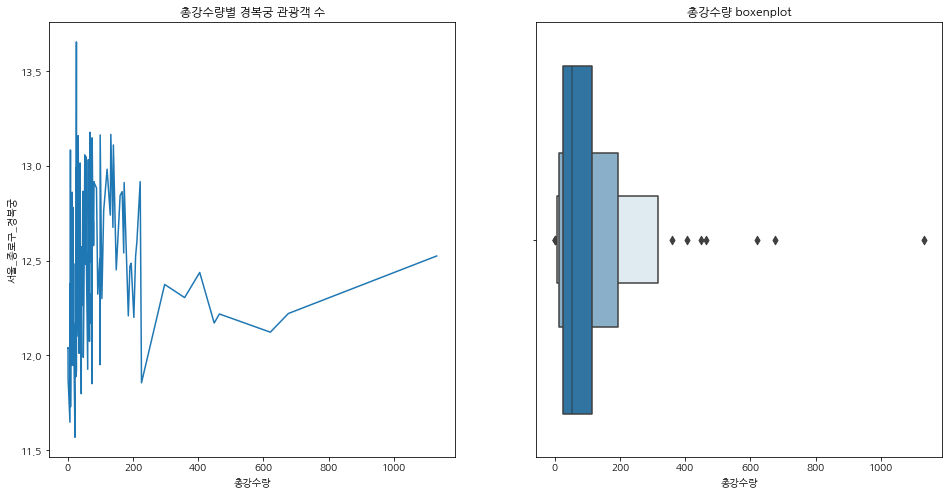

In [277]:
# 강수량이랑 관광객 수 확인해보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.lineplot(data = data, x = '총강수량', y = '서울_종로구_경복궁', ax = ax[0])
sns.boxenplot(data['총강수량'], ax = ax[1])
ax[0].set_title('총강수량별 경복궁 관광객 수')
ax[1].set_title('총강수량 boxenplot')

# 평균풍속

Text(0.5, 1.0, '평균풍속 boxenplot')

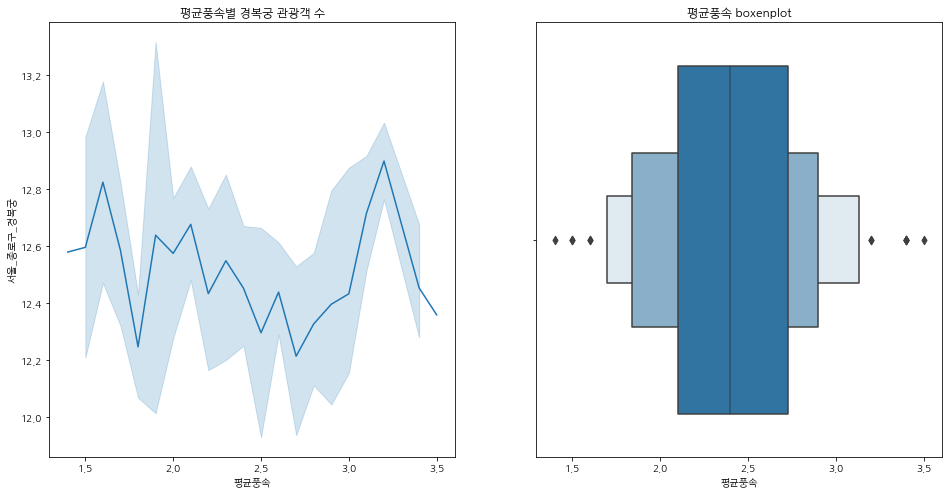

In [278]:
# 평균풍속과 관광객 수 확인해보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.lineplot(data = data, x = '평균풍속', y = '서울_종로구_경복궁', ax = ax[0])
sns.boxenplot(data['평균풍속'], ax = ax[1])
ax[0].set_title('평균풍속별 경복궁 관광객 수')
ax[1].set_title('평균풍속 boxenplot')

# 일조시간

Text(0.5, 1.0, '일조시간 boxenplot')

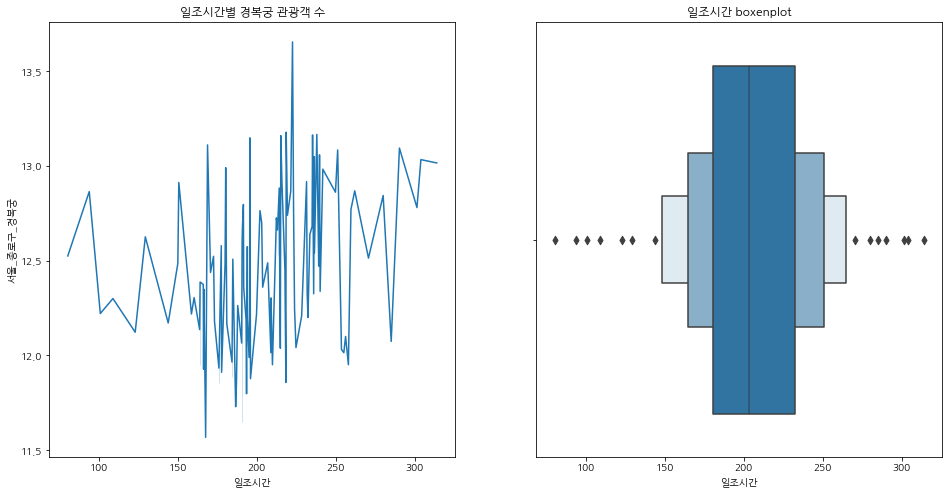

In [279]:
# 일조시간과 관광객 수 확인해보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.lineplot(data = data, x = '일조시간', y = '서울_종로구_경복궁', ax = ax[0])
sns.boxenplot(data['일조시간'], ax = ax[1])
ax[0].set_title('일조시간별 경복궁 관광객 수')
ax[1].set_title('일조시간 boxenplot')

# Statsmodel

In [280]:
len(data[['서울_종로구_경복궁', '서울_종로구_종묘', '서울_종로구_창경궁', '서울_종로구_창덕궁', '서울_중구_남산골한옥마을',
       '서울_중구_덕수궁', '서울_중구_서울시립미술관 본관', '서울_용산구_국립중앙박물관',
       '서울_노원구_태릉 ·  강릉 · 조선왕릉전시관', '서울_서대문구_서대문형무소역사관',
       '서울_서초구_헌릉ㆍ인릉']].columns)

11

In [281]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data['weather'] = label.fit_transform(data['weather'])

for i in ['year','month']:
  data[i] = data[i].astype('int')

X = sm.add_constant(data[['평균기온','최고기온','최저상대습도','평균상대습도','총강수량','평균풍속','일조시간','year','month','weather']])
y = data['서울_종로구_경복궁']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             서울_종로구_경복궁   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     14.95
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           9.17e-16
Time:                        09:54:15   Log-Likelihood:                -8.1303
No. Observations:                 108   AIC:                             38.26
Df Residuals:                      97   BIC:                             67.76
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4517     33.608     -0.162      0.8

# Modeling

In [282]:
!pip install catboost

In [283]:
data['일시'] = data['일시'].astype('int')
train = data[data['일시'] <= 201712]
test = data[data['일시'] > 201712]

X_train, y_train = train[['평균기온','최고기온','최저상대습도','평균상대습도','총강수량','평균풍속','일조시간','year','month','weather']], train['서울_종로구_경복궁']
X_test, y_test = test[['평균기온','최고기온','최저상대습도','평균상대습도','총강수량','평균풍속','일조시간','year','month','weather']], test['서울_종로구_경복궁']

X_train = pd.get_dummies(X_train, columns = ['weather'])
X_test = pd.get_dummies(X_test, columns = ['weather'])

In [284]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
models = {'lightgbm':LGBMRegressor(), 'xgboost':XGBRegressor(),'catboost': CatBoostRegressor(),'lr': LinearRegression(),'ridge': Ridge(),'lasso': Lasso()}
model_rmse = {}
for i,j in models.items():
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  y_pred = np.exp(y_pred) - 1
  model_test = y_test.copy()
  model_test = np.exp(model_test)-1
  RMSE = mean_squared_error(model_test, y_pred) ** 0.5

  model_rmse[i] = RMSE

# 가장 좋은 성능을 내는 모델 찾아서 맞추기
print(sorted(model_rmse.items(), key = lambda item:item[1]))

[09:54:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.025114
0:	learn: 0.4195617	total: 1.04ms	remaining: 1.04s
1:	learn: 0.4139759	total: 2.21ms	remaining: 1.1s
2:	learn: 0.4099761	total: 3.23ms	remaining: 1.07s
3:	learn: 0.4046036	total: 4.27ms	remaining: 1.06s
4:	learn: 0.4009455	total: 5.3ms	remaining: 1.05s
5:	learn: 0.3967992	total: 6.41ms	remaining: 1.06s
6:	learn: 0.3916496	total: 7.47ms	remaining: 1.06s
7:	learn: 0.3871243	total: 8.48ms	remaining: 1.05s
8:	learn: 0.3829816	total: 9.61ms	remaining: 1.06s
9:	learn: 0.3778475	total: 10.4ms	remaining: 1.03s
10:	learn: 0.3748022	total: 11.5ms	remaining: 1.03s
11:	learn: 0.3701357	total: 12.5ms	remaining: 1.03s
12:	learn: 0.3655624	total: 13.5ms	remaining: 1.02s
13:	learn: 0.3611025	total: 14.6ms	remaining: 1.03s
14:	learn: 0.3567292	total: 15.6ms	remaining: 1.02s
15:	learn: 0.3529878	total: 16.5ms	remaining: 1.02s
16:	learn: 0.3492264	to

# 불쾌지수, 여름철 체감온도, 겨울철 체감온도 feature 만들어주기

In [285]:
train['평균상대습도']

0     54
1     55
2     51
3     54
4     57
      ..
79    71
80    61
81    56
82    54
83    56
Name: 평균상대습도, Length: 84, dtype: int64

In [286]:
class final_dataframe:
  # 여름철 체감온도
  def summer_feature(df = None):
    H = df['평균상대습도']
    T = df['평균기온'].apply(lambda x:32 + (1.8 * x))

    temperature = -42.379 + (2.04901523*T) + (10.14333127 * H) - (0.22475541 * T * H) - (6.83783 * (10 ** -3) * (T ** 2)) - (5.481717 * (10 ** -2)*(H**2)) + (1.22874 * (10 ** -3) * (T ** 2) * H) + (8.5282 * (10 ** -4) * T * (H **2)) - (1.99 * (10**-6) * (T**2) * (H**2))    
    df['여름철 체감온도'] = temperature

    return df

  # 겨울철 체감온도
  def winter_feature(df = None):
    T = df['평균기온']
    V = df['평균풍속']

    temperature = 13.12 + (0.6215 * T) - (11.37 * 0.16 ** V) + (0.3965 *V *0.16**T)

    df['겨울철 체감온도'] = temperature
    return df

  # 불쾌지수 구하기
  def 불쾌지수(df = None):
    T = df['평균기온']
    H = df['평균상대습도']
    
    불쾌지수 = (9/5 * T) - (0.55 * (1 - H/100) * ((9/5 * T) - 26)) + 32

    df['불쾌지수'] = 불쾌지수

    return df

  def final_dataframe(df = None):
    df1=final_dataframe.summer_feature(df = df)
    df2=final_dataframe.winter_feature(df = df1)
    df3=final_dataframe.불쾌지수(df = df2)
    return df3

X_train = final_dataframe.final_dataframe(X_train)
X_test = final_dataframe.final_dataframe(X_test)

In [287]:
X_train.head()

,평균기온,최고기온,최저상대습도,평균상대습도,총강수량,평균풍속,일조시간,year,month,weather_0,weather_1,weather_2,weather_3,여름철 체감온도,겨울철 체감온도,불쾌지수
0,-7.2,0.3,19,54,8.9,2.8,218.5,2011,1,0,1,0,0,220.263363,596682.899431,28.89688
1,1.2,13.2,15,55,29.1,2.6,166.6,2011,2,0,1,0,0,149.388194,13.883197,40.06040
2,3.6,16.8,12,51,14.6,3.4,240.2,2011,3,0,0,1,0,130.476121,15.336864,43.74064
3,10.7,19.0,10,54,110.1,3.2,202.1,2011,4,0,0,1,0,97.020249,19.737769,52.96522
4,17.9,31.2,15,57,53.4,2.8,180.4,2011,5,0,0,1,0,78.479349,24.177661,62.74897


In [288]:
X_test.head()

,평균기온,최고기온,최저상대습도,평균상대습도,총강수량,평균풍속,일조시간,year,month,weather_0,weather_1,weather_2,weather_3,여름철 체감온도,겨울철 체감온도,불쾌지수
84,-4.0,8.7,16,48,8.5,1.9,186.7,2018,1,0,1,0,0,179.447623,1159.805260,34.29520
85,-1.6,10.4,13,45,29.6,2.2,194.2,2018,2,0,1,0,0,156.174935,28.294796,37.85620
86,8.1,22.1,13,59,49.5,1.9,209.1,2018,3,0,0,1,0,108.732933,17.804537,49.15521
87,13.0,26.3,8,55,130.3,2.0,223.4,2018,4,0,0,1,0,89.241841,20.908428,56.04350
88,18.2,29.6,22,63,222.0,1.7,231.6,2018,5,0,0,1,0,76.850896,23.926912,63.38434


In [289]:
# 여름철 체감온도, 겨울철 체감온도, 불쾌지수를 넣었을 때 statsmodels
X = X_train
y = y_train

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             서울_종로구_경복궁   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     13.06
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           1.38e-14
Time:                        09:54:21   Log-Likelihood:                 9.5732
No. Observations:                  84   AIC:                             12.85
Df Residuals:                      68   BIC:                             51.75
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
평균기온          -0.0809      0.083     -0.979      0.3

In [290]:
# 최고 성능의 모델의 경우 62912.313082469846 까지 내려갔다.
models = {'lightgbm':LGBMRegressor(), 'xgboost':XGBRegressor(),'catboost': CatBoostRegressor(),'lr': LinearRegression(),'ridge': Ridge(),'lasso': Lasso()}
model_rmse = {}
for i,j in models.items():
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  y_pred = np.exp(y_pred) - 1
  model_test = y_test.copy()
  model_test = np.exp(model_test)-1
  RMSE = mean_squared_error(model_test, y_pred) ** 0.5

  model_rmse[i] = RMSE

# 가장 좋은 성능을 내는 모델 찾아서 맞추기
print(sorted(model_rmse.items(), key = lambda item:item[1]))

[09:54:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.025114
0:	learn: 0.4214029	total: 1.2ms	remaining: 1.2s
1:	learn: 0.4170776	total: 2.09ms	remaining: 1.04s
2:	learn: 0.4116188	total: 3.65ms	remaining: 1.21s
3:	learn: 0.4063370	total: 6.47ms	remaining: 1.61s
4:	learn: 0.4017168	total: 8.22ms	remaining: 1.64s
5:	learn: 0.3985847	total: 10.3ms	remaining: 1.7s
6:	learn: 0.3939648	total: 11.8ms	remaining: 1.67s
7:	learn: 0.3887327	total: 13.4ms	remaining: 1.67s
8:	learn: 0.3843194	total: 15.4ms	remaining: 1.7s
9:	learn: 0.3806263	total: 16.4ms	remaining: 1.62s
10:	learn: 0.3763261	total: 17.4ms	remaining: 1.56s
11:	learn: 0.3729096	total: 18.4ms	remaining: 1.52s
12:	learn: 0.3686193	total: 19.4ms	remaining: 1.47s
13:	learn: 0.3639314	total: 20.4ms	remaining: 1.43s
14:	learn: 0.3598034	total: 21.4ms	remaining: 1.4s
15:	learn: 0.3555729	total: 22.6ms	remaining: 1.39s
16:	learn: 0.3511474	total

In [291]:
# 그러면 나는 계절별로 모델을 돌려주는게 좋지 않을까? 혹은 계절별로 feature를 다르게 주면 어떻게 될까?
# 왜냐하면 겨울철 체감온도와 여름철 체감온도 등등 데이터를 다르게 사용하면 더 좋은 결과가 나올 것 같다.

In [292]:
# 계절별로 나눠주기 위해서 train과 target을 합쳐주자.
train = pd.concat([X_train, y_train], axis = 1)
test = pd.concat([X_test, y_test], axis = 1)

In [293]:
# 계절별로 나눠준 이후에 list에 저장하자.
겨울 = train[train['weather_1'] == 1]
가을 = train[train['weather_0'] == 1]
봄 = train[train['weather_2'] == 1]
여름 = train[train['weather_3'] == 1]

weather_list = [봄, 여름, 가을, 겨울]

test_겨울 = test[test['weather_1'] == 1]
test_가을 = test[test['weather_0'] == 1]
test_봄 = test[test['weather_2'] == 1]
test_여름 = test[test['weather_3'] == 1]

test_weather_list = [test_봄, test_여름, test_가을, test_겨울]
for i in range(len(weather_list)):
  weather_list[i]=weather_list[i].drop(['weather_1','weather_0','weather_2','weather_3'], axis = 1)
  test_weather_list[i] = test_weather_list[i].drop(['weather_0','weather_1','weather_2','weather_3'], axis = 1)

# 모델링
models = {'lightgbm':LGBMRegressor(), 'xgboost':XGBRegressor(),'catboost': CatBoostRegressor(),'lr': LinearRegression(),'ridge': Ridge(),'lasso': Lasso()}
model_rmse = {}
for k in range(len(weather_list)):
  for i,j in models.items():
    model = j
    model.fit(weather_list[k].drop('서울_종로구_경복궁', axis = 1), weather_list[k]['서울_종로구_경복궁'])
    y_pred = model.predict(test_weather_list[k].drop('서울_종로구_경복궁', axis= 1))
    y_test = test_weather_list[k]['서울_종로구_경복궁'].apply(lambda x: np.exp(x)-1)
    y_pred = np.exp(y_pred)-1

    RMSE = mean_squared_error(y_test, y_pred) ** 0.5
    model_rmse[i] = RMSE
    
  # 가장 좋은 성능을 내는 모델 찾아서 맞추기
  print(f'{k}',sorted(model_rmse.items(), key = lambda item:item[1]))

[09:54:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.019623
0:	learn: 0.3422952	total: 1.08ms	remaining: 1.08s
1:	learn: 0.3385864	total: 1.95ms	remaining: 975ms
2:	learn: 0.3351787	total: 2.56ms	remaining: 850ms
3:	learn: 0.3327760	total: 3.21ms	remaining: 798ms
4:	learn: 0.3301652	total: 3.91ms	remaining: 778ms
5:	learn: 0.3279022	total: 4.58ms	remaining: 759ms
6:	learn: 0.3250794	total: 5.25ms	remaining: 745ms
7:	learn: 0.3224717	total: 5.89ms	remaining: 731ms
8:	learn: 0.3200824	total: 6.55ms	remaining: 722ms
9:	learn: 0.3174712	total: 7.22ms	remaining: 715ms
10:	learn: 0.3145047	total: 7.8ms	remaining: 702ms
11:	learn: 0.3111638	total: 8.3ms	remaining: 684ms
12:	learn: 0.3082603	total: 8.86ms	remaining: 673ms
13:	learn: 0.3047659	total: 9.37ms	remaining: 660ms
14:	learn: 0.3025904	total: 10.1ms	remaining: 660ms
15:	learn: 0.2996152	total: 10.6ms	remaining: 653ms
16:	learn: 0.2965070	to

# 계절별로 statsmodels 찍어보기

In [294]:
# 봄의 stats models
X = weather_list[0].drop('서울_종로구_경복궁', axis = 1)
y = weather_list[0]['서울_종로구_경복궁']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             서울_종로구_경복궁   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.875e+04
Date:                Tue, 06 Jul 2021   Prob (F-statistic):                    2.92e-18
Time:                        09:54:27   Log-Likelihood:                          23.212
No. Observations:                  21   AIC:                                     -22.42
Df Residuals:                       9   BIC:                                     -9.889
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [295]:
# 여름의 stats models
X = weather_list[1].drop('서울_종로구_경복궁', axis = 1)
y = weather_list[1]['서울_종로구_경복궁']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             서울_종로구_경복궁   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              5576.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):                    6.84e-16
Time:                        09:54:27   Log-Likelihood:                          11.005
No. Observations:                  21   AIC:                                      1.989
Df Residuals:                       9   BIC:                                      14.52
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [296]:
# 가을의 stats models
X = weather_list[2].drop('서울_종로구_경복궁', axis = 1)
y = weather_list[2]['서울_종로구_경복궁']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             서울_종로구_경복궁   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              7204.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):                    2.16e-16
Time:                        09:54:27   Log-Likelihood:                          13.017
No. Observations:                  21   AIC:                                     -2.034
Df Residuals:                       9   BIC:                                      10.50
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [297]:
# 겨울의 stats models
X = weather_list[3].drop('서울_종로구_경복궁', axis = 1)
y = weather_list[3]['서울_종로구_경복궁']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             서울_종로구_경복궁   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              6448.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):                    3.56e-16
Time:                        09:54:27   Log-Likelihood:                          13.148
No. Observations:                  21   AIC:                                     -2.296
Df Residuals:                       9   BIC:                                      10.24
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [298]:
# 겨울의 경우에는 아예 못맞추는 것 같다.
# 불쾌지수와 여름철 체감온도를 제거하고 모델에 넣어주면 성능이 좋아지지 않을까?
weather_list[3] = weather_list[3].drop(['여름철 체감온도','불쾌지수'], axis = 1)
test_weather_list[3] = test_weather_list[3].drop(['여름철 체감온도','불쾌지수'], axis = 1)

X = weather_list[3].drop('서울_종로구_경복궁', axis = 1)
y = weather_list[3]['서울_종로구_경복궁']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             서울_종로구_경복궁   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              7709.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):                    1.16e-19
Time:                        09:54:27   Log-Likelihood:                          11.003
No. Observations:                  21   AIC:                                     -2.006
Df Residuals:                      11   BIC:                                      8.439
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [299]:
# 여름철 체감온도와 불쾌지수를 제거했을 때 rmse가 왜 올라가는가?
models = {'lightgbm':LGBMRegressor(), 'xgboost':XGBRegressor(),'catboost': CatBoostRegressor(),'lr': LinearRegression(),'ridge': Ridge(),'lasso': Lasso()}
model_rmse = {}
for i,j in models.items():
  model = j
  model.fit(X, y)
  y_pred = model.predict(test_weather_list[3].drop('서울_종로구_경복궁', axis = 1))

  y_pred = np.exp(y_pred) - 1
  model_test = test_weather_list[3]['서울_종로구_경복궁'].copy()
  model_test = np.exp(model_test)-1
  RMSE = mean_squared_error(model_test, y_pred) ** 0.5

  model_rmse[i] = RMSE

# 가장 좋은 성능을 내는 모델 찾아서 맞추기
print(sorted(model_rmse.items(), key = lambda item:item[1]))

[09:54:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.019623
0:	learn: 0.2171174	total: 524us	remaining: 524ms
1:	learn: 0.2161276	total: 1.18ms	remaining: 588ms
2:	learn: 0.2152434	total: 1.82ms	remaining: 605ms
3:	learn: 0.2135727	total: 2.38ms	remaining: 592ms
4:	learn: 0.2127074	total: 2.97ms	remaining: 591ms
5:	learn: 0.2119161	total: 3.42ms	remaining: 567ms
6:	learn: 0.2108154	total: 4.04ms	remaining: 574ms
7:	learn: 0.2097305	total: 4.64ms	remaining: 575ms
8:	learn: 0.2088347	total: 5.27ms	remaining: 580ms
9:	learn: 0.2079212	total: 5.77ms	remaining: 571ms
10:	learn: 0.2069935	total: 6.37ms	remaining: 573ms
11:	learn: 0.2061720	total: 6.89ms	remaining: 567ms
12:	learn: 0.2053966	total: 7.44ms	remaining: 565ms
13:	learn: 0.2043924	total: 8.06ms	remaining: 568ms
14:	learn: 0.2035423	total: 8.68ms	remaining: 570ms
15:	learn: 0.2025143	total: 9.29ms	remaining: 571ms
16:	learn: 0.2011736	t

In [300]:
test_weather_list[3]

,평균기온,최고기온,최저상대습도,평균상대습도,총강수량,평균풍속,일조시간,year,month,겨울철 체감온도,서울_종로구_경복궁
84,-4.0,8.7,16,48,8.5,1.9,186.7,2018,1,1159.805260,11.729745
85,-1.6,10.4,13,45,29.6,2.2,194.2,2018,2,28.294796,12.194794
95,-0.6,13.5,16,46,16.4,1.8,199.9,2018,12,14.470277,12.214874
96,-0.9,8.5,11,46,0.0,1.8,215.0,2019,1,15.854428,12.038328
97,1.0,14.5,15,47,23.8,1.8,190.5,2019,2,13.435762,12.482890
107,1.4,12.9,17,58,22.6,2.1,164.2,2019,12,13.811775,12.387289


In [301]:
# 올라가는 이유조차 모르겠다.
# 이번엔 여름에 겨울철 체감온도를 제거해보자.
weather_list[1] = weather_list[1].drop('겨울철 체감온도', axis = 1)
test_weather_list[1] = test_weather_list[1].drop('겨울철 체감온도', axis = 1)
X_train, X_test = weather_list[1].drop('서울_종로구_경복궁', axis = 1), test_weather_list[1].drop('서울_종로구_경복궁', axis = 1)
y_train, y_test = weather_list[1]['서울_종로구_경복궁'], test_weather_list[1]['서울_종로구_경복궁']

# 최고 성능의 모델의 경우 62912.313082469846 까지 내려갔다.
models = {'lightgbm':LGBMRegressor(), 'xgboost':XGBRegressor(),'catboost': CatBoostRegressor(),'lr': LinearRegression(),'ridge': Ridge(),'lasso': Lasso()}
model_rmse = {}
for i,j in models.items():
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  y_pred = np.exp(y_pred) - 1
  model_test = y_test.copy()
  model_test = np.exp(model_test)-1
  RMSE = mean_squared_error(model_test, y_pred) ** 0.5

  model_rmse[i] = RMSE

# 가장 좋은 성능을 내는 모델 찾아서 맞추기
print(sorted(model_rmse.items(), key = lambda item:item[1]))

[09:54:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.019623
0:	learn: 0.2506474	total: 910us	remaining: 909ms
1:	learn: 0.2496021	total: 5.84ms	remaining: 2.91s
2:	learn: 0.2483828	total: 8.26ms	remaining: 2.75s
3:	learn: 0.2466488	total: 9.52ms	remaining: 2.37s
4:	learn: 0.2453136	total: 10.2ms	remaining: 2.04s
5:	learn: 0.2438933	total: 11.3ms	remaining: 1.86s
6:	learn: 0.2434407	total: 11.9ms	remaining: 1.69s
7:	learn: 0.2418740	total: 12.8ms	remaining: 1.59s
8:	learn: 0.2412358	total: 13.5ms	remaining: 1.49s
9:	learn: 0.2401342	total: 14.3ms	remaining: 1.42s
10:	learn: 0.2390613	total: 14.9ms	remaining: 1.34s
11:	learn: 0.2381104	total: 15.6ms	remaining: 1.29s
12:	learn: 0.2371118	total: 16.5ms	remaining: 1.25s
13:	learn: 0.2363141	total: 17.4ms	remaining: 1.23s
14:	learn: 0.2357135	total: 18.2ms	remaining: 1.19s
15:	learn: 0.2345935	total: 19ms	remaining: 1.17s
16:	learn: 0.2334237	tot

# 이동평균 사용해서 예측해보기

In [302]:
data.columns

Index(['일시', '평균기온', '최고기온', '최저상대습도', '평균상대습도', '총강수량', '평균풍속', '일조시간',
       '서울_종로구_경복궁', '서울_종로구_종묘', '서울_종로구_창경궁', '서울_종로구_창덕궁', '서울_중구_남산골한옥마을',
       '서울_중구_덕수궁', '서울_중구_서울시립미술관 본관', '서울_용산구_국립중앙박물관',
       '서울_노원구_태릉 ·  강릉 · 조선왕릉전시관', '서울_서대문구_서대문형무소역사관', '서울_서초구_헌릉ㆍ인릉',
       'year', 'month', 'weather'],
      dtype='object')

In [303]:
# data 불러오기
data = data[['일시', '평균기온', '최고기온', '최저상대습도', '평균상대습도', '총강수량', '평균풍속', '일조시간','year','month','weather','서울_종로구_경복궁']]
data = final_dataframe.final_dataframe(data)

# train과 test 나눠주기
train = data[data['일시'] <= 201712]
test = data[data['일시'] > 201712]

In [304]:
# train과 test 나누기
X_train, y_train = train.drop('서울_종로구_경복궁', axis = 1), train['서울_종로구_경복궁']
X_test, y_test = test.drop('서울_종로구_경복궁', axis = 1), test['서울_종로구_경복궁']

# Linear Regression으로 예측한 후 넣어주기
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns = ['서울_종로구_경복궁'])
X_test = X_test.reset_index(drop = True)
X_test = pd.concat([X_test, y_pred['서울_종로구_경복궁']], axis =1)
X_train = pd.concat([X_train, y_train], axis = 1)

print(X_train.shape, X_test.shape)

(84, 15) (24, 15)


In [305]:
data = pd.concat([X_train, X_test], axis = 0)

In [306]:
data['moving_average'] = data['서울_종로구_경복궁'].rolling(12).mean()
data['moving_average'] = data['moving_average'].fillna(data['moving_average'].mean())

In [307]:
data

,일시,평균기온,최고기온,최저상대습도,평균상대습도,총강수량,평균풍속,일조시간,year,month,weather,여름철 체감온도,겨울철 체감온도,불쾌지수,서울_종로구_경복궁,moving_average
0,201101,-7.2,0.3,19,54,8.9,2.8,218.5,2011,1,1,220.263363,596682.899431,28.89688,11.857819,12.416459
1,201102,1.2,13.2,15,55,29.1,2.6,166.6,2011,2,1,149.388194,13.883197,40.06040,12.349372,12.416459
2,201103,3.6,16.8,12,51,14.6,3.4,240.2,2011,3,2,130.476121,15.336864,43.74064,12.338315,12.416459
3,201104,10.7,19.0,10,54,110.1,3.2,202.1,2011,4,2,97.020249,19.737769,52.96522,12.763884,12.416459
4,201105,17.9,31.2,15,57,53.4,2.8,180.4,2011,5,2,78.479349,24.177661,62.74897,12.991270,12.416459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,201908,27.2,36.8,28,69,190.5,1.6,239.3,2019,8,3,84.390469,29.418968,77.04532,12.276701,12.361663
20,201909,22.6,30.5,24,65,139.8,2.2,168.9,2019,9,0,75.706766,26.964145,69.85410,12.689895,12.355971
21,201910,16.4,28.2,23,62,55.5,2.1,236.5,2019,10,0,79.747787,23.070267,60.78432,12.752018,12.355641
22,201911,7.6,22.1,14,56,78.8,2.2,203.2,2019,11,0,110.857902,17.641646,48.66144,12.485877,12.351135


In [308]:
data = data.drop('서울_종로구_경복궁', axis = 1)

In [309]:
X_train = data[data['일시'] <= 201712]
X_test = data[data['일시'] > 201712]

In [310]:
drop = ['일시', 'year']
dummies = ['month','weather']

X_train = X_train.drop(drop, axis= 1)
X_test = X_test.drop(drop, axis =1)

X_train = pd.get_dummies(data = X_train, columns = dummies)
X_test = pd.get_dummies(data = X_test, columns = dummies)

In [311]:
# 최고 성능의 모델의 경우 62912.313082469846 까지 내려갔다.
models = {'lightgbm':LGBMRegressor(), 'xgboost':XGBRegressor(),'catboost': CatBoostRegressor(),'lr': LinearRegression(),'ridge': Ridge(),'lasso': Lasso()}
model_rmse = {}
for i,j in models.items():
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  y_pred = np.exp(y_pred) - 1
  model_test = y_test.copy()
  model_test = np.exp(model_test)-1
  RMSE = mean_squared_error(model_test, y_pred) ** 0.5

  model_rmse[i] = RMSE

# 가장 좋은 성능을 내는 모델 찾아서 맞추기
print(sorted(model_rmse.items(), key = lambda item:item[1]))

[09:54:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.025114
0:	learn: 0.4192534	total: 1.45ms	remaining: 1.44s
1:	learn: 0.4142271	total: 2.56ms	remaining: 1.28s
2:	learn: 0.4091608	total: 3.62ms	remaining: 1.2s
3:	learn: 0.4041772	total: 4.72ms	remaining: 1.18s
4:	learn: 0.3993049	total: 5.89ms	remaining: 1.17s
5:	learn: 0.3950483	total: 7.25ms	remaining: 1.2s
6:	learn: 0.3907054	total: 8.63ms	remaining: 1.22s
7:	learn: 0.3852218	total: 9.73ms	remaining: 1.21s
8:	learn: 0.3805203	total: 10.7ms	remaining: 1.18s
9:	learn: 0.3753558	total: 11.3ms	remaining: 1.12s
10:	learn: 0.3702296	total: 12.3ms	remaining: 1.11s
11:	learn: 0.3667493	total: 13.3ms	remaining: 1.1s
12:	learn: 0.3630084	total: 14.3ms	remaining: 1.09s
13:	learn: 0.3590538	total: 15.6ms	remaining: 1.1s
14:	learn: 0.3548346	total: 16.8ms	remaining: 1.1s
15:	learn: 0.3506507	total: 18.2ms	remaining: 1.12s
16:	learn: 0.3463621	total